### OBJECTIVE 

In [1]:
print('''
To build a robust multi-class classification model using XGBoost that can identify the specific type of network attack ( DOS_SYN_Hping, ARP Poisoning,
MQTT Publish, NMAP Scans.) or determine if the flow is normal. This model aims to assist network administrators in not only detecting attacks but also 
understanding the nature and severity of threats, facilitating faster and more targeted mitigation strategies.

''')


To build a robust multi-class classification model using XGBoost that can identify the specific type of network attack ( DOS_SYN_Hping, ARP Poisoning,
MQTT Publish, NMAP Scans.) or determine if the flow is normal. This model aims to assist network administrators in not only detecting attacks but also 
understanding the nature and severity of threats, facilitating faster and more targeted mitigation strategies.




### DATA DESCRIPTION

 The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios. Incorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb,and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can leverage the RT-IoT2022 dataset to advance the capabilities of Intrusion Detection Systems (IDS), fostering the development of robust and adaptive security solutions for real-time IoT networks.



| Feature Name | Simple Description |
|:-------------|:--------------------|
| uid | Unique ID for each flow |
| flow_duration | How long the connection lasted (in seconds) |
| fwd_pkts_tot | Number of packets going forward |
| bwd_pkts_tot | Number of packets going backward |
| fwd_data_pkts_tot | Number of forward packets carrying real data |
| fwd_pkts_per_sec | Forward packets sent per second |
| bwd_pkts_per_sec | Backward packets sent per second |
| flow_pkts_per_sec | Total packets sent per second |
| down_up_ratio | Ratio of backward to forward packets |
| fwd_header_size_tot | Total size of headers in forward packets |
| fwd_header_size_min | Smallest header size in forward packets |
| fwd_header_size_max | Largest header size in forward packets |
| bwd_header_size_tot | Total size of headers in backward packets |
| fwd_pkts_payload.max | Largest data (payload) size in forward packets |
| fwd_pkts_payload.min | Smallest data size in forward packets |
| fwd_pkts_payload.tot | Total data size in forward packets |
| fwd_pkts_payload.avg | Average data size in forward packets |
| fwd_pkts_payload.std | Variation in data size in forward packets |
| bwd_pkts_payload.max | Largest data size in backward packets |
| bwd_pkts_payload.min | Smallest data size in backward packets |
| bwd_pkts_payload.tot | Total data size in backward packets |
| bwd_pkts_payload.avg | Average data size in backward packets |
| bwd_pkts_payload.std | Variation in data size in backward packets |
| flow_pkts_payload.max | Largest data size in full flow |
| flow_pkts_payload.min | Smallest data size in full flow |
| flow_pkts_payload.avg | Average data size in full flow |
| payload_bytes_per_second | Data bytes sent per second |
| flow_FIN_flag_count | Number of FIN flags in TCP connection |
| flow_SYN_flag_count | Number of SYN flags in TCP connection |
| flow_RST_flag_count | Number of RST flags in TCP connection |
| fwd_PSH_flag_count | Number of PSH flags in forward TCP packets |
| bwd_PSH_flag_count | Number of PSH flags in backward TCP packets |
| flow_ACK_flag_count | Number of ACK flags in TCP connection |
| fwd_URG_flag_count | Number of URG flags in forward TCP packets |
| bwd_URG_flag_count | Number of URG flags in backward TCP packets |
| fwd_iat.max | Largest time gap between forward packets |
| fwd_iat.min | Smallest time gap between forward packets |
| fwd_iat.avg | Average time gap between forward packets |
| bwd_iat.max | Largest time gap between backward packets |
| bwd_iat.min | Smallest time gap between backward packets |
| bwd_iat.avg | Average time gap between backward packets |
| flow_iat.avg | Average time gap between any two packets |
| fwd_subflow_pkts | Number of packets in a forward subflow |
| bwd_subflow_pkts | Number of packets in a backward subflow |
| fwd_subflow_bytes | Number of payload bytes in a forward subflow |
| bwd_subflow_bytes | Number of payload bytes in a backward subflow |
| fwd_bulk_bytes | Bulk data bytes sent forward |
| bwd_bulk_bytes | Bulk data bytes sent backward |
| fwd_bulk_packets | Bulk packets sent forward |
| bwd_bulk_packets | Bulk packets sent backward |
| active.max | Longest active period in flow |
| active.min | Shortest active period in flow |
| active.avg | Average active period in flow |
| idle.max | Longest idle (no data) time in flow |
| idle.min | Shortest idle time in flow |
| idle.avg | Average idle time in flow |
| fwd_init_window_size | Initial window size in forward packets |
| bwd_init_window_size | Initial window size in backward packets |
| fwd_last_window_size | Last window size in forward packets |
| bwd_last_window_size | Last window size in backward packets |


In [2]:
#Importing libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

### DATA LOADING

In [4]:
df =  pd.read_csv("C:\\Users\\DEVIKA\\Desktop\\cybersecurity project.csv")
df.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


### DATA EXPLORATION

In [5]:
# First 5 rows of df
df.head().style.set_sticky()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,0.156193,0.437341,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0,33,76,8.444444,13.115936,0,23,32,6.400000,9.555103,0,33,108,7.714286,11.618477,761.985779,29729182.960000,32011597.870000,4001449.734000,10403073.630000,4438.877106,1511693.954000,2026391.029000,506597.757300,680406.147100,761.985779,29729182.960000,32011597.870000,2462430.606000,8199746.707000,3.373777,3.000000,1.666667,25.333333,10.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2282414.913000,2282414.913000,2282414.913000,2282414.913000,0.000000,29729182.960000,29729182.960000,29729182.960000,29729182.960000,0.000000,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,0.156821,0.439097,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0,33,76,8.444444,13.115936,0,23,32,6.400000,9.555103,0,33,108,7.714286,11.618477,247.001648,29855277.060000,31883584.020000,3985448.003000,10463455.560000,4214.048386,1576435.804000,1876260.996000,469065.249000,741351.686200,247.001648,29855277.060000,31883584.020000,2452583.386000,8242459.025000,3.387323,3.000000,1.666667,25.333333,10.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2028306.961000,2028306.961000,2028306.961000,2028306.961000,0.000000,29855277.060000,29855277.060000,29855277.060000,29855277.060000,0.000000,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,0.155647,0.435811,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0,33,74,8.222222,12.852799,0,21,30,6.000000,8.689074,0,33,104,7.428571,11.229866,283.956528,29842149.020000,32124053.000000,4015506.625000,10442377.920000,2456.903458,1476048.946000,2013769.865000,503442.466300,660344.360000,283.956528,29842149.020000,32124053.000000,2471081.000000,8230592.557000,3.237450,3.000000,1.666667,24.666667,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2281903.982000,2281903.982000,2281903.982000,2281903.982000,0.000000,29842149.020000,29842149.020000,29842149.020000,29842149.020000,0.000000,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,0.156440,0.438033,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0,33,74,8.222222,12.852799,0,21,30,6.000000,8.689074,0,33,104,7.428571,11.229866,288.963318,29913774.970000,31961063.150000,3995132.893000,10482528.220000,3933.906555,1551892.042000,1883784.056000,470946.013900,724569.317900,288.963318,29913774.970000,31961063.150000,2458543.319000,8257786.423000,3.253959,3.000000,1.666667,24.666667,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2047288.179000,2047288.179000,2047288.179000

In [6]:
# No.of Rows and Columns
df.shape

(123117, 85)

In [7]:
# Columns of  df
df.columns

Index(['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min', 'flow_pkts_payload.max', 'flow_pkts_payload.tot', 'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'fwd_iat.min', 'fwd_iat.max',
     

In [8]:
# Data Types
df.dtypes.value_counts()

float64    47
int64      35
object      3
Name: count, dtype: int64

In [9]:
#  Data Overview
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [10]:
#Unique values in df
df.nunique()

Unnamed: 0                  94659
id.orig_p                   65478
id.resp_p                    1809
proto                           3
service                        10
flow_duration               16380
fwd_pkts_tot                  163
bwd_pkts_tot                  172
fwd_data_pkts_tot             116
bwd_data_pkts_tot             154
fwd_pkts_per_sec            15891
bwd_pkts_per_sec            15426
flow_pkts_per_sec           16111
down_up_ratio                 468
fwd_header_size_tot           353
fwd_header_size_min             7
fwd_header_size_max             8
bwd_header_size_tot           352
bwd_header_size_min             7
bwd_header_size_max             9
flow_FIN_flag_count            11
flow_SYN_flag_count             8
flow_RST_flag_count             9
fwd_PSH_flag_count             70
bwd_PSH_flag_count             98
flow_ACK_flag_count           210
fwd_URG_flag_count              2
bwd_URG_flag_count              1
flow_CWR_flag_count             5
flow_ECE_flag_

In [11]:
#  Descriptive Statistics
numerical_features = df.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Features:\n", numerical_features.describe().T)


Descriptive Statistics for Numerical Features:
                              count          mean           std  min           25%           50%           75%           max
Unnamed: 0                123117.0  3.703509e+04  3.045911e+04  0.0   6059.000000  3.310000e+04  6.387900e+04  9.465800e+04
id.orig_p                 123117.0  3.463926e+04  1.907062e+04  0.0  17702.000000  3.722100e+04  5.097100e+04  6.553500e+04
id.resp_p                 123117.0  1.014305e+03  5.256372e+03  0.0     21.000000  2.100000e+01  2.100000e+01  6.538900e+04
flow_duration             123117.0  3.809566e+00  1.300054e+02  0.0      0.000001  4.000000e-06  5.000000e-06  2.172834e+04
fwd_pkts_tot              123117.0  2.268826e+00  2.233656e+01  0.0      1.000000  1.000000e+00  1.000000e+00  4.345000e+03
bwd_pkts_tot              123117.0  1.909509e+00  3.301831e+01  0.0      1.000000  1.000000e+00  1.000000e+00  1.011200e+04
fwd_data_pkts_tot         123117.0  1.471218e+00  1.963520e+01  0.0      1.000000  

In [12]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Example: Check outliers in first few numeric features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols[:81]:  # Check first 5 numeric features
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


Unnamed: 0: 0 outliers
id.orig_p: 0 outliers
id.resp_p: 28452 outliers
flow_duration: 19171 outliers
fwd_pkts_tot: 17662 outliers
bwd_pkts_tot: 32364 outliers
fwd_data_pkts_tot: 24161 outliers
bwd_data_pkts_tot: 17520 outliers
fwd_pkts_per_sec: 0 outliers
bwd_pkts_per_sec: 0 outliers
flow_pkts_per_sec: 0 outliers
down_up_ratio: 25796 outliers
fwd_header_size_tot: 24422 outliers
fwd_header_size_min: 22417 outliers
fwd_header_size_max: 24411 outliers
bwd_header_size_tot: 33148 outliers
bwd_header_size_min: 32065 outliers
bwd_header_size_max: 33137 outliers
flow_FIN_flag_count: 8064 outliers
flow_SYN_flag_count: 27362 outliers
flow_RST_flag_count: 27898 outliers
fwd_PSH_flag_count: 12505 outliers
bwd_PSH_flag_count: 9958 outliers
flow_ACK_flag_count: 33083 outliers
fwd_URG_flag_count: 2006 outliers
bwd_URG_flag_count: 0 outliers
flow_CWR_flag_count: 71 outliers
flow_ECE_flag_count: 72 outliers
fwd_pkts_payload.min: 28458 outliers
fwd_pkts_payload.max: 28458 outliers
fwd_pkts_payload.tot: 

In [13]:
# Values in categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 40)


Value counts for column: proto
proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64
----------------------------------------
Value counts for column: service
service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64
----------------------------------------
Value counts for column: Attack_type
Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64
----------------------------------------


### DATA VISUALIZATION


Target Variable Distribution:
 Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64


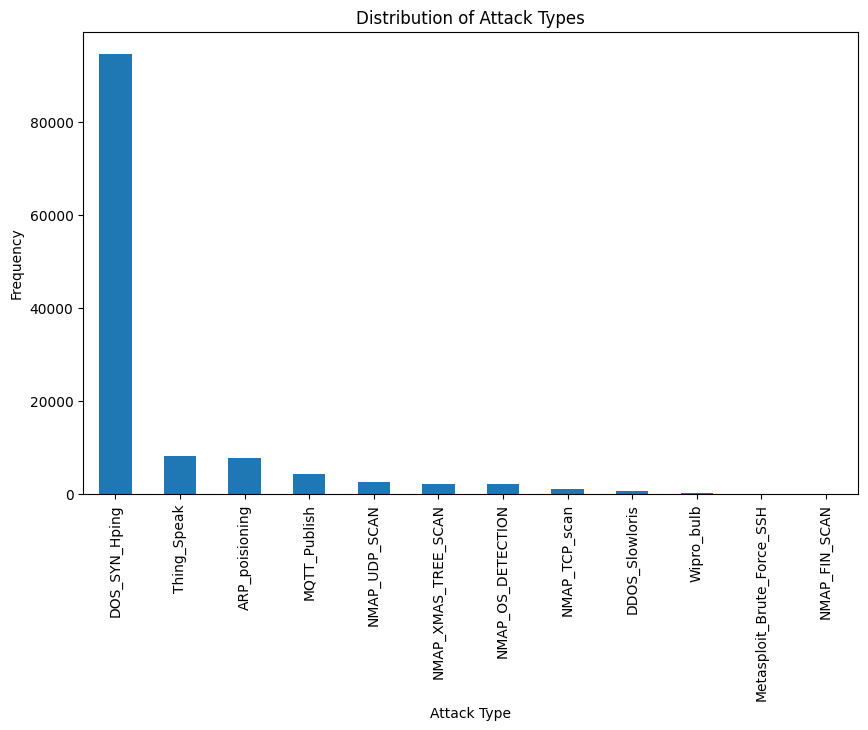

In [14]:
#  Target Variable Analysis
print("\nTarget Variable Distribution:\n", df['Attack_type'].value_counts())
plt.figure(figsize=(10, 6))
df['Attack_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.show()

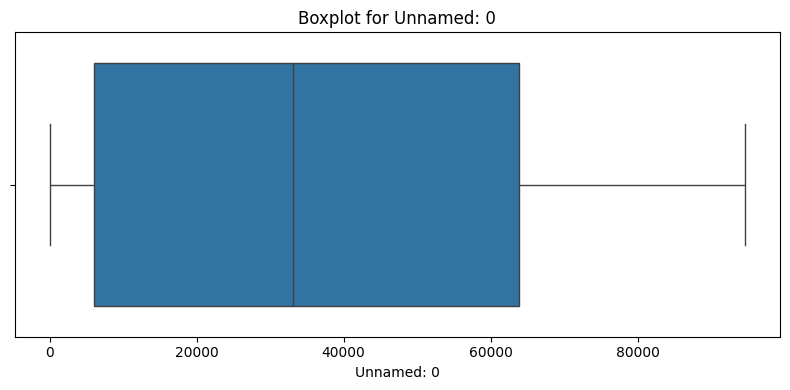

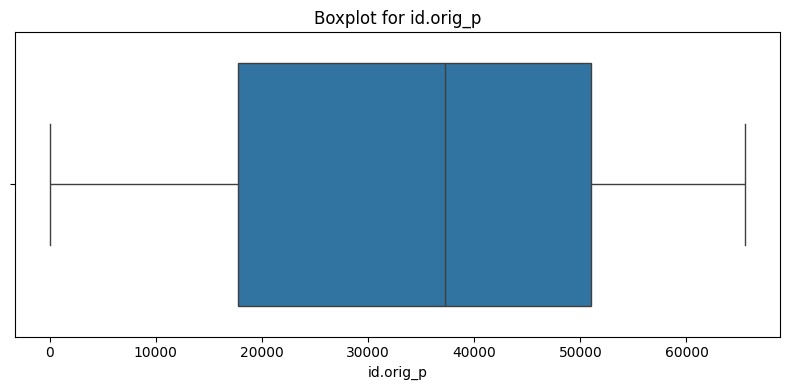

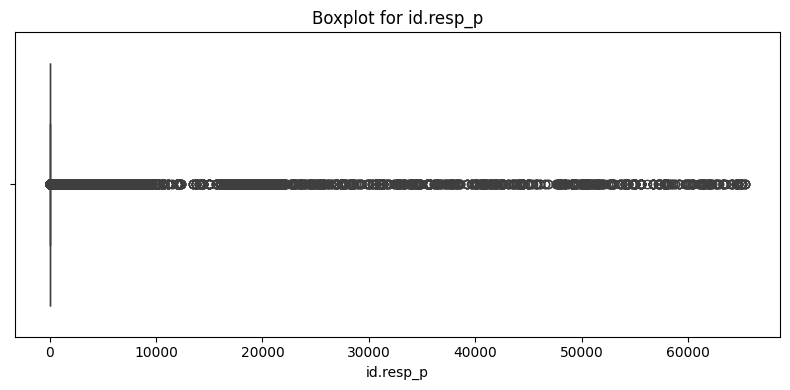

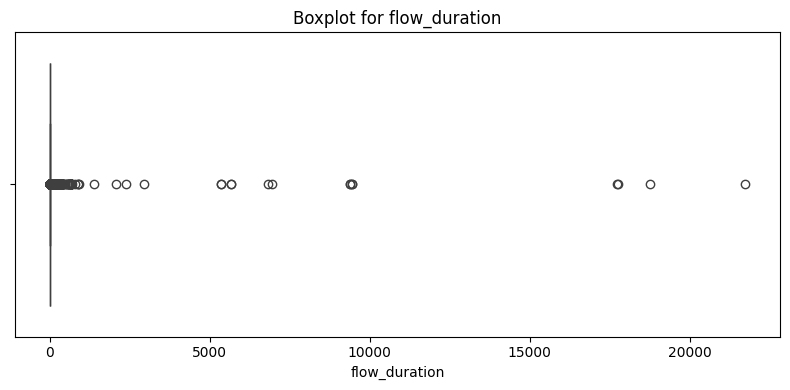

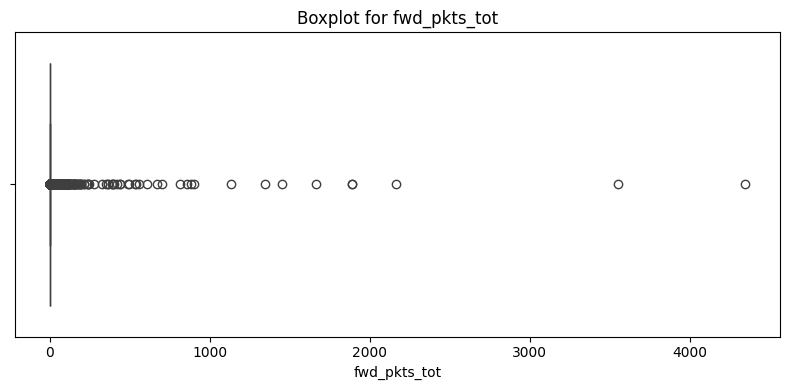

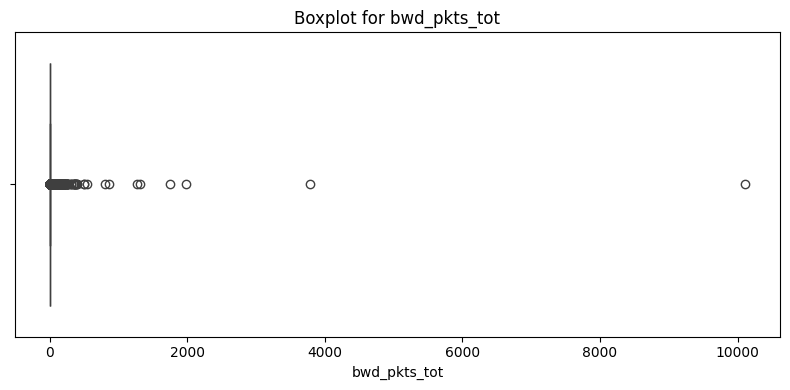

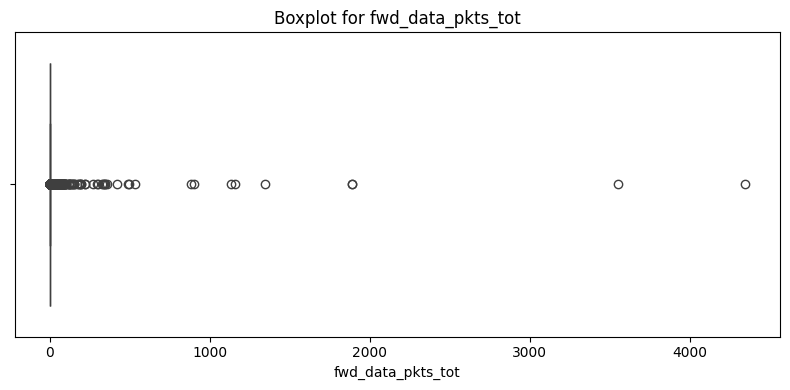

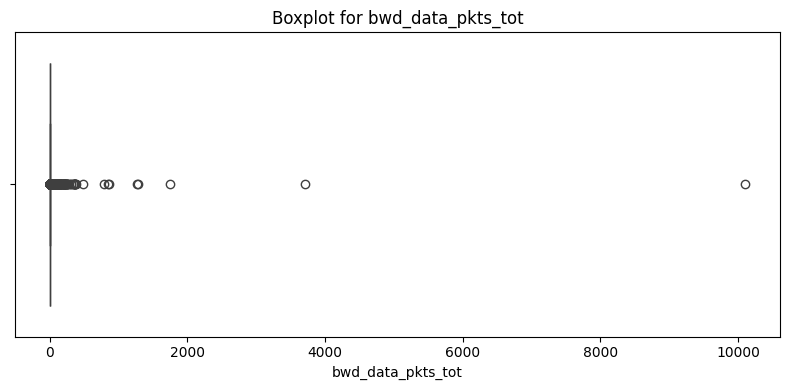

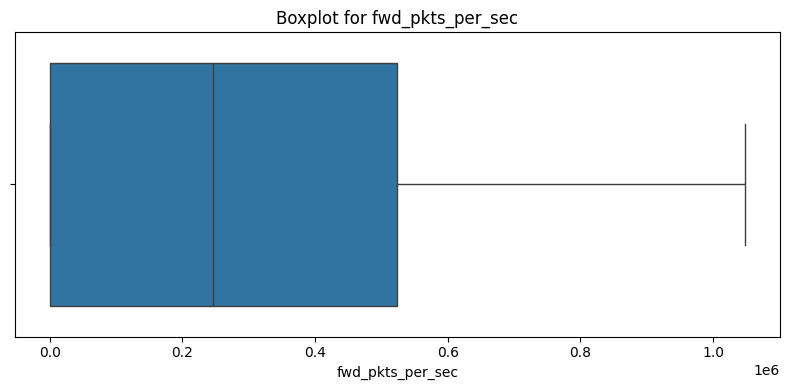

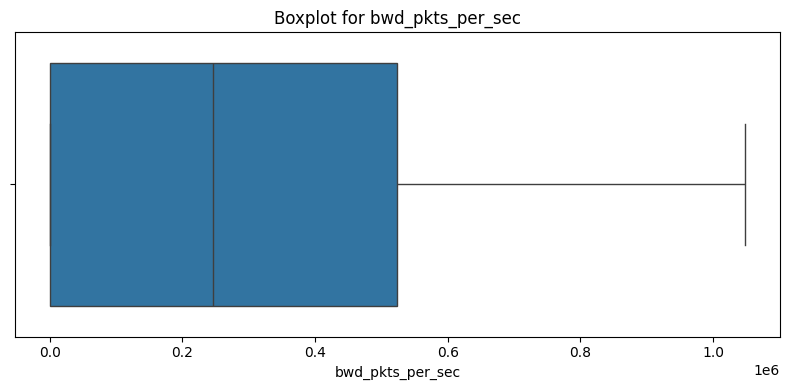

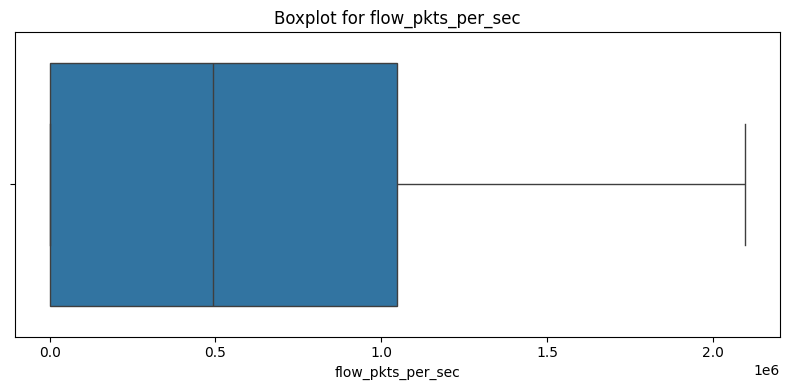

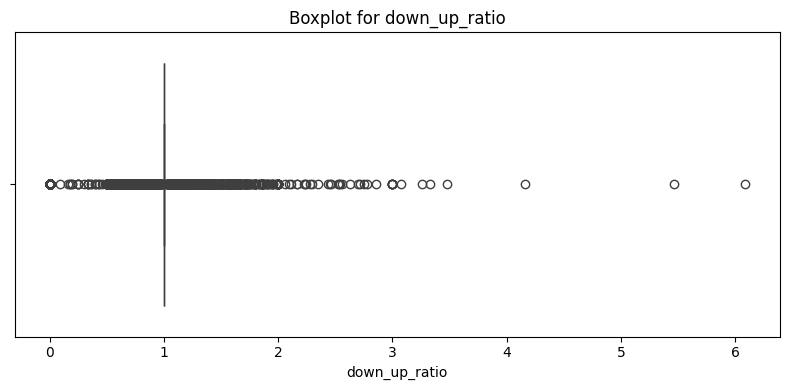

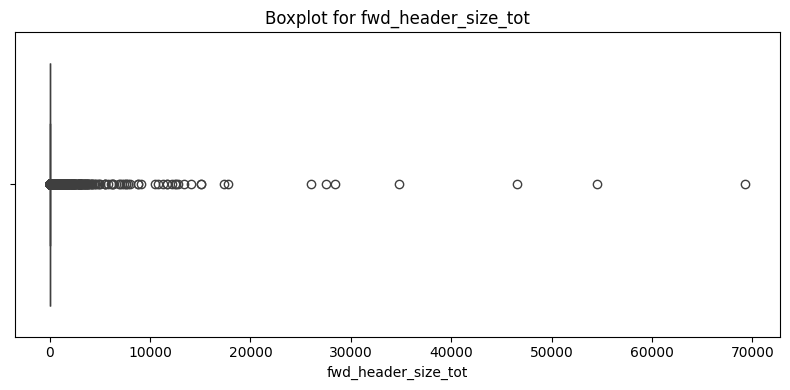

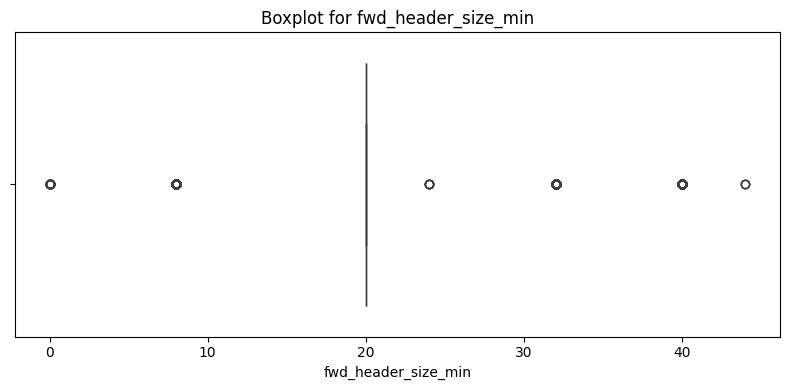

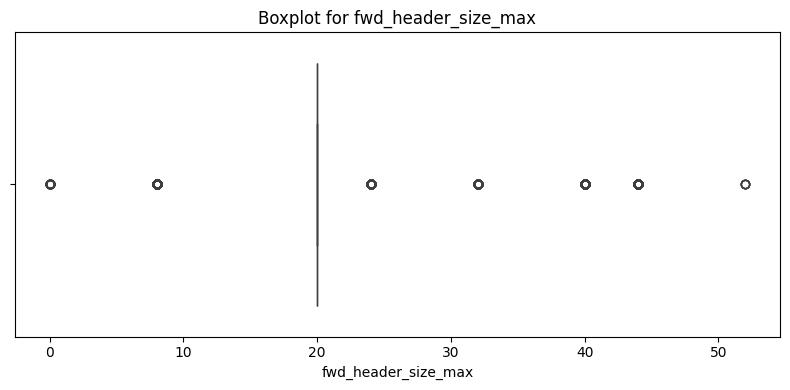

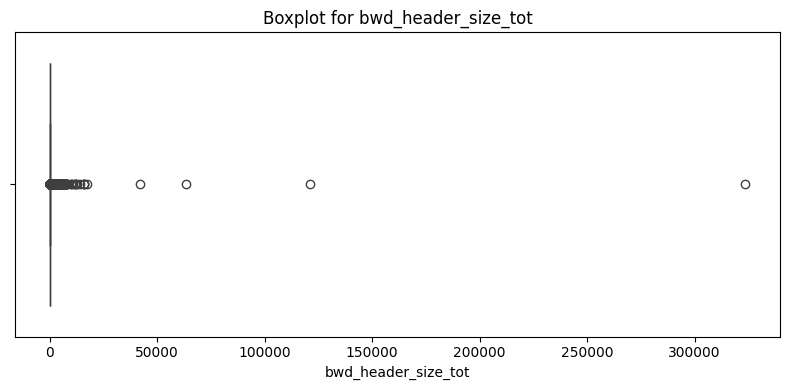

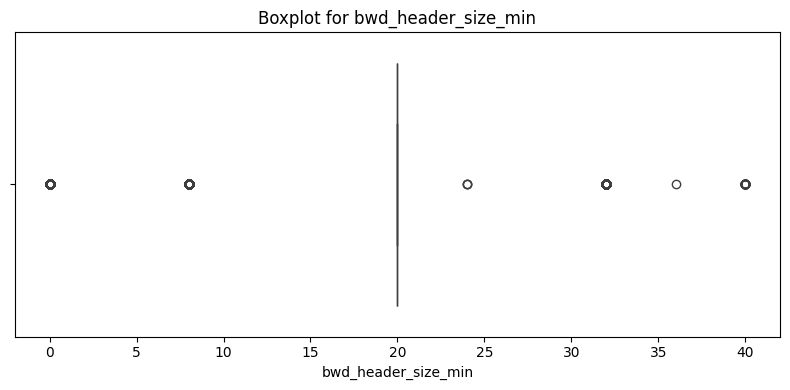

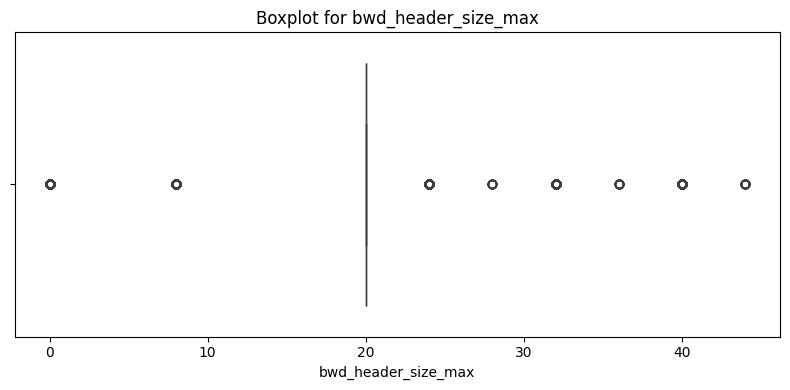

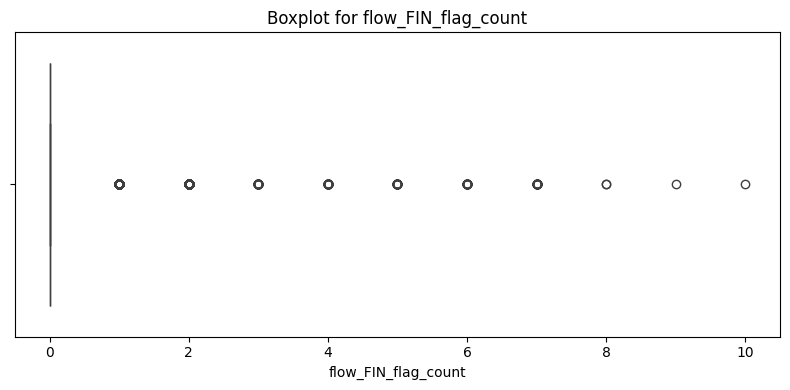

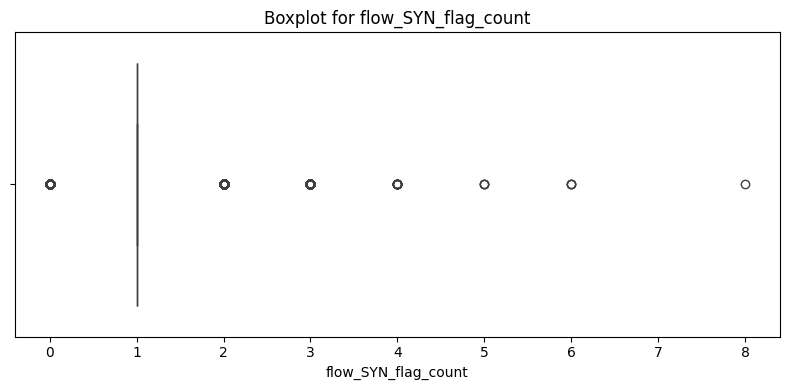

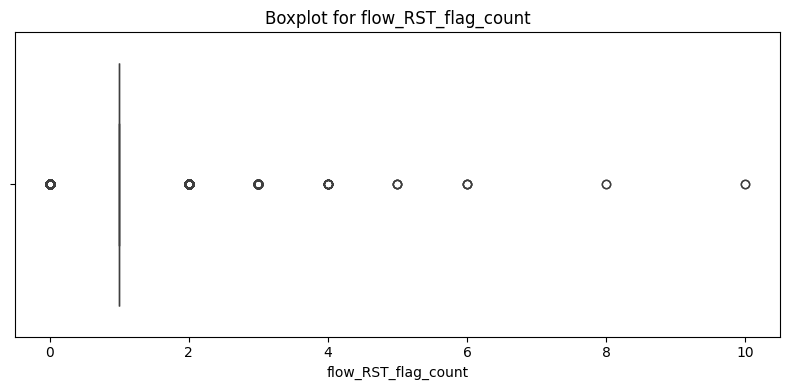

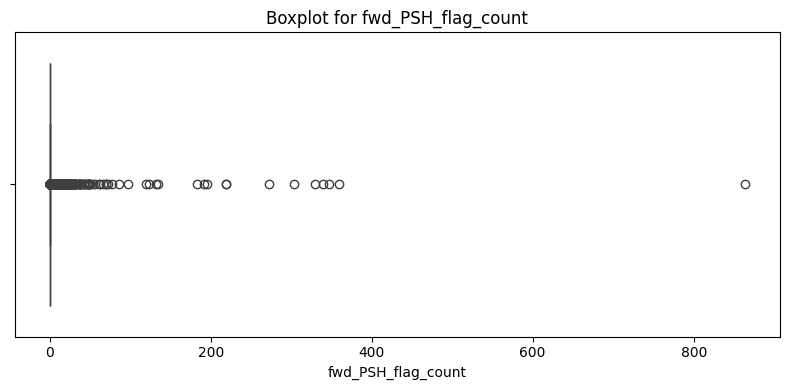

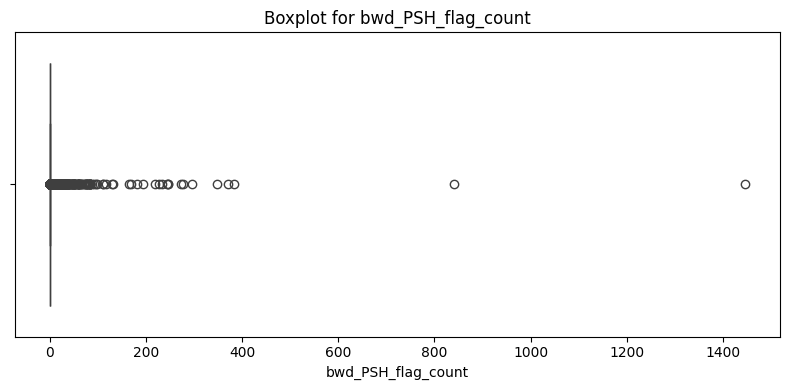

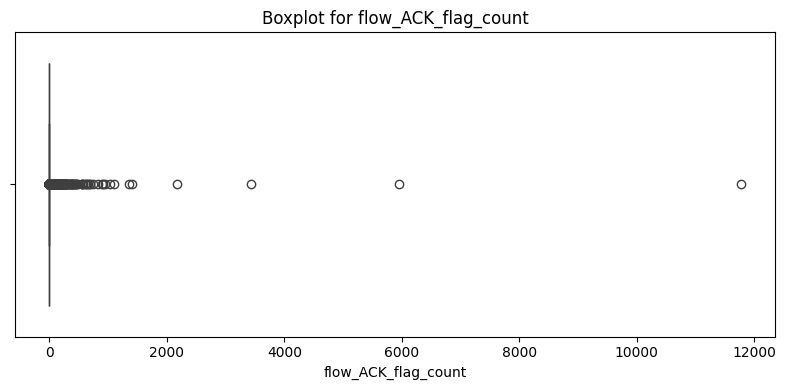

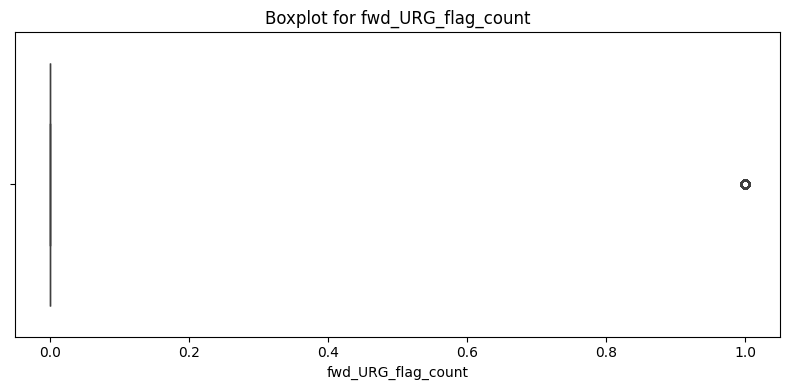

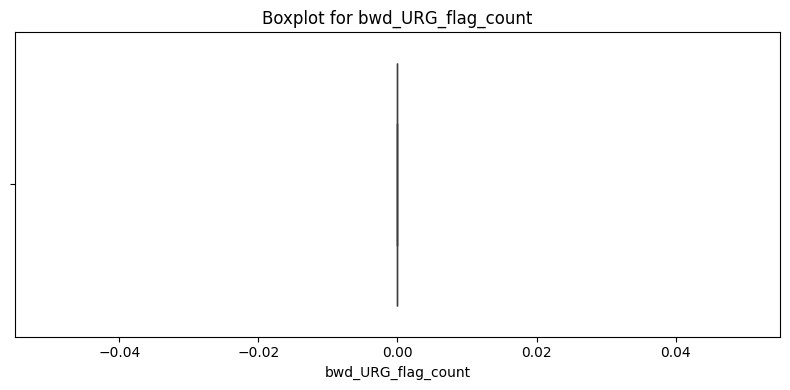

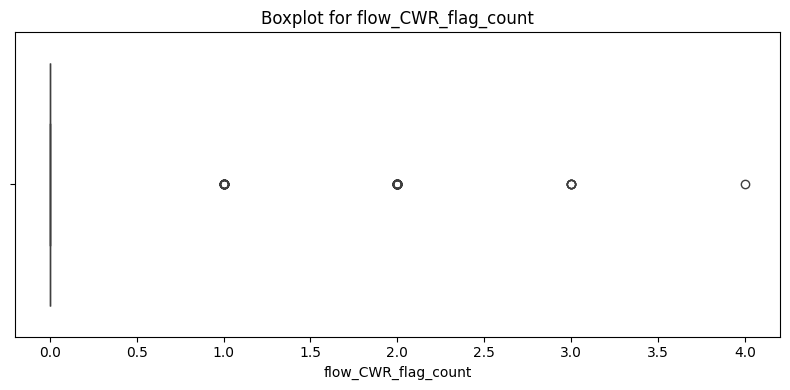

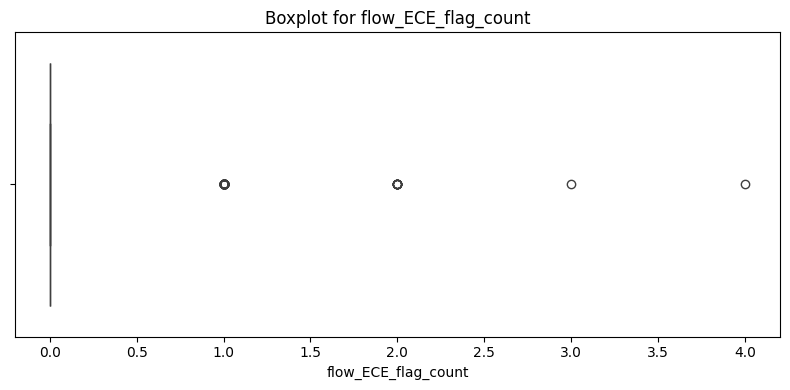

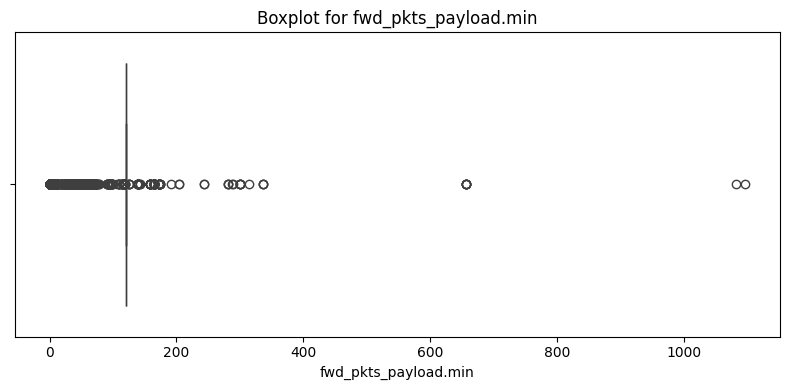

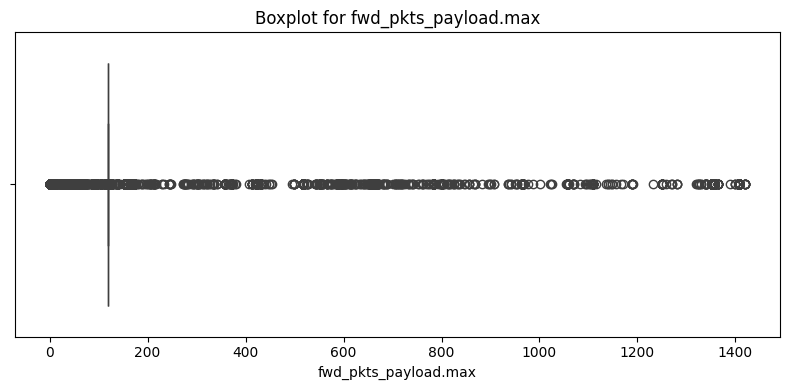

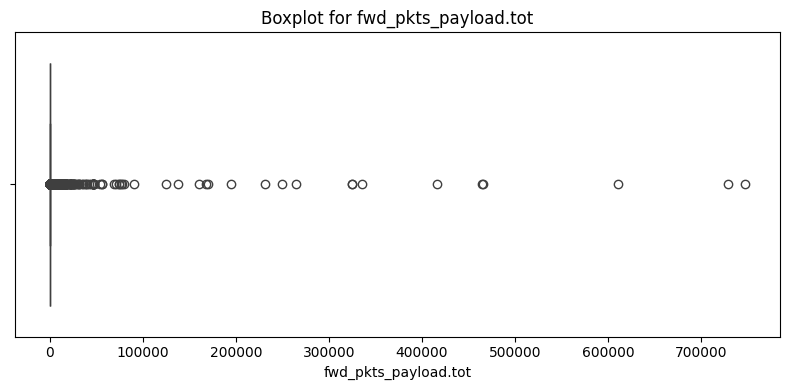

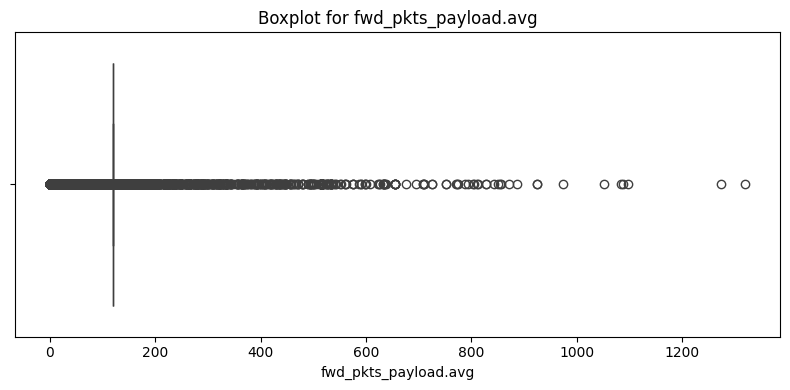

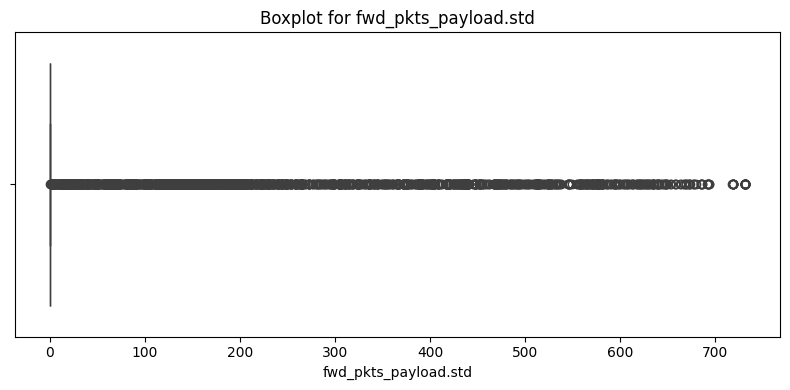

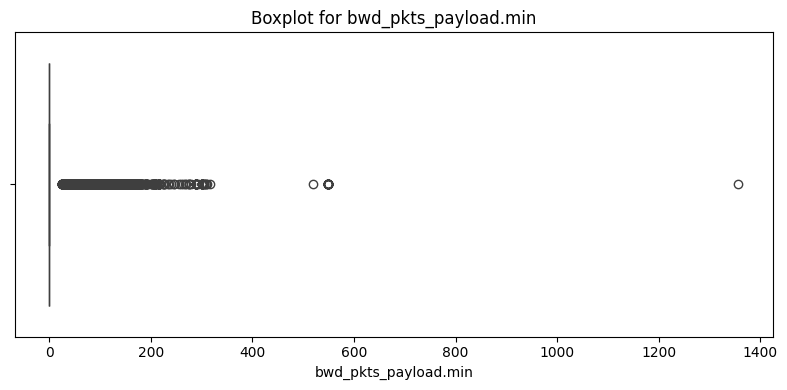

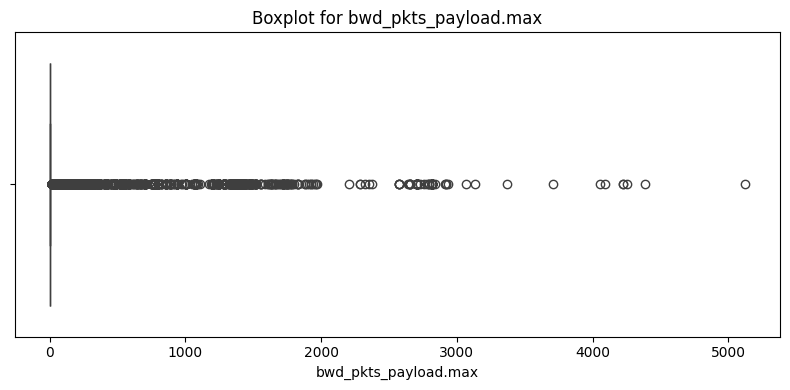

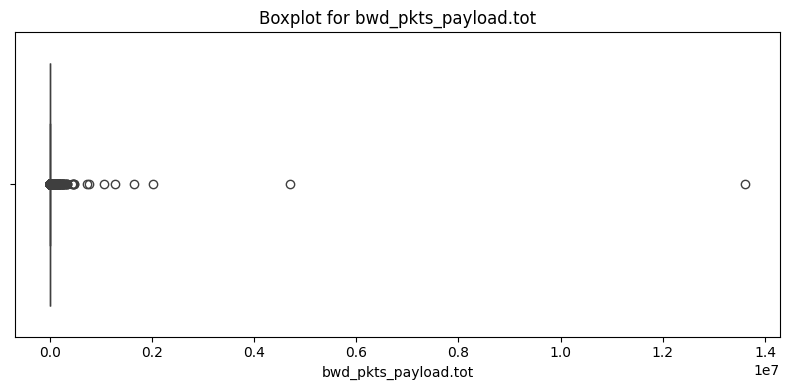

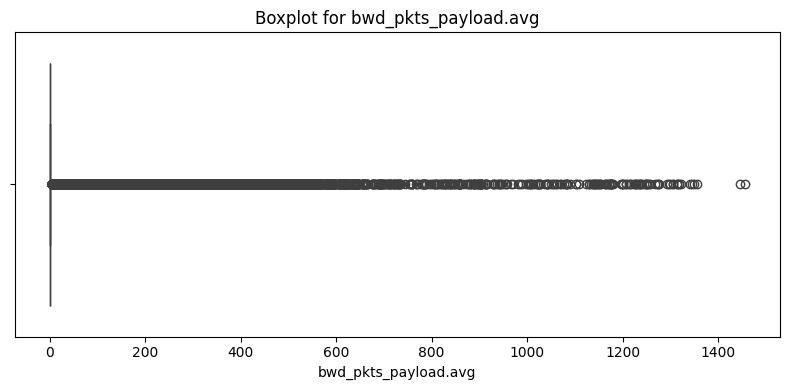

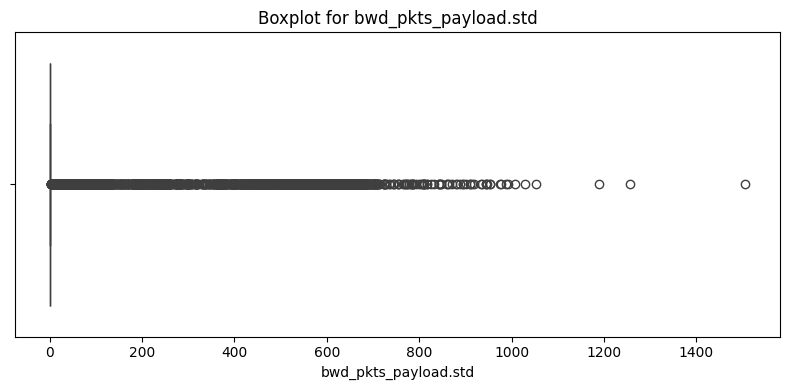

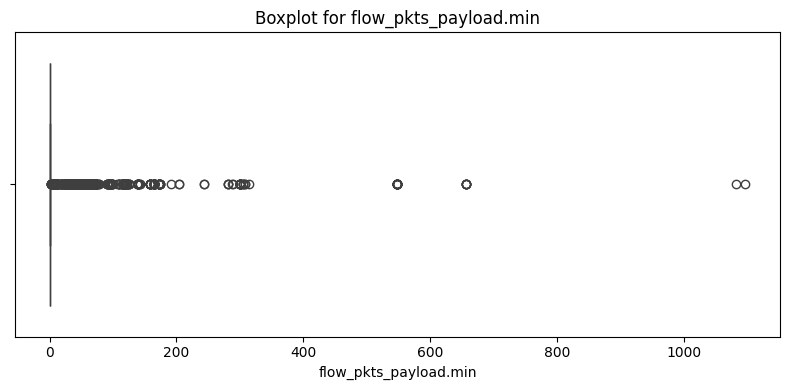

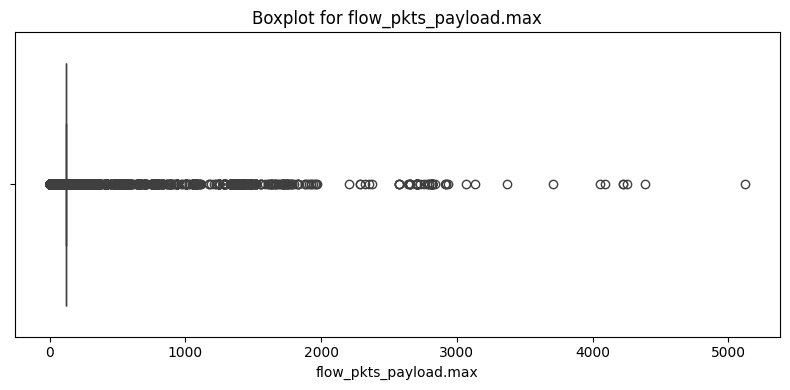

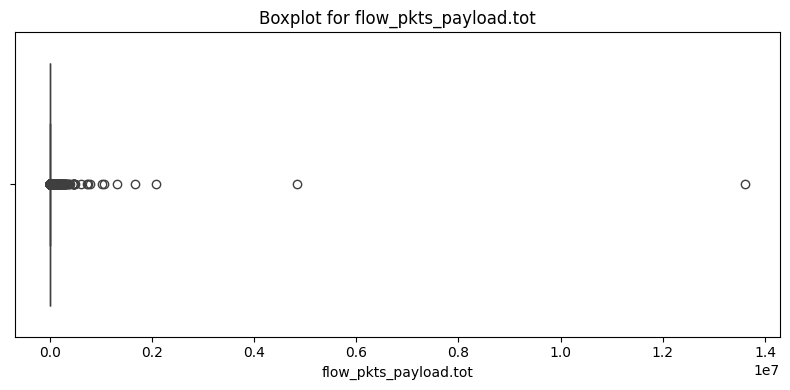

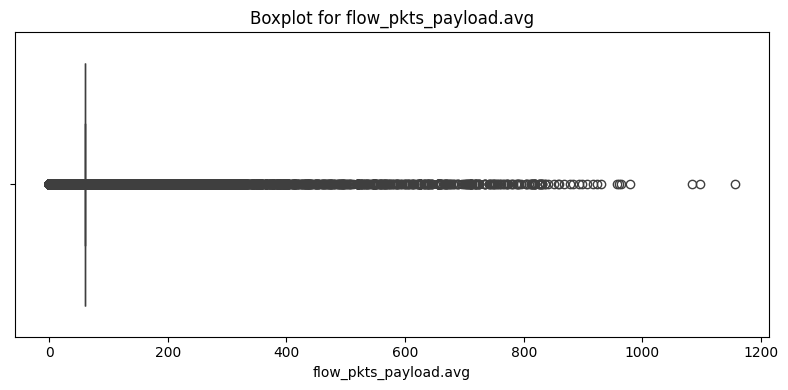

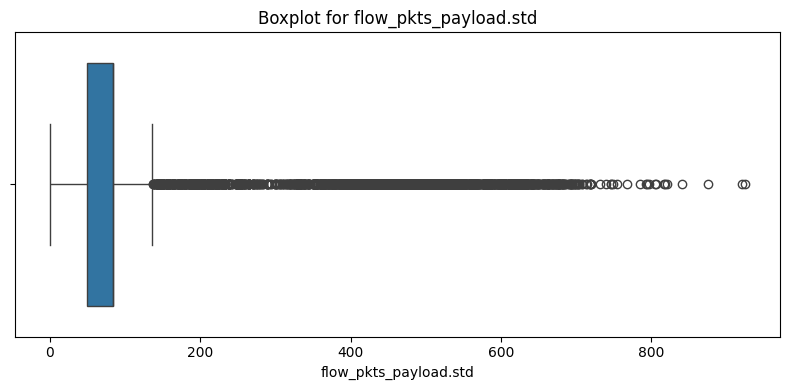

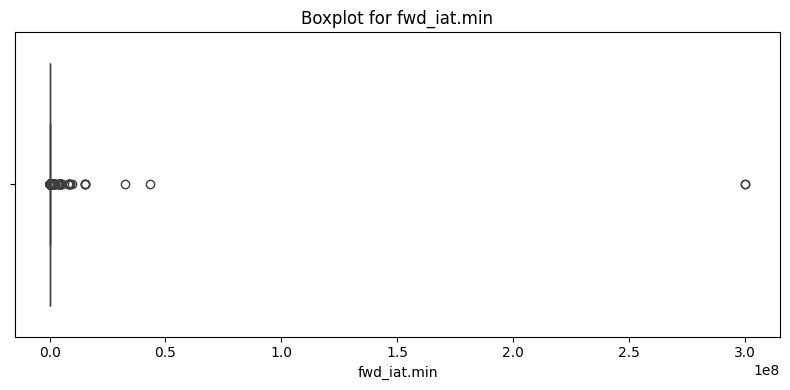

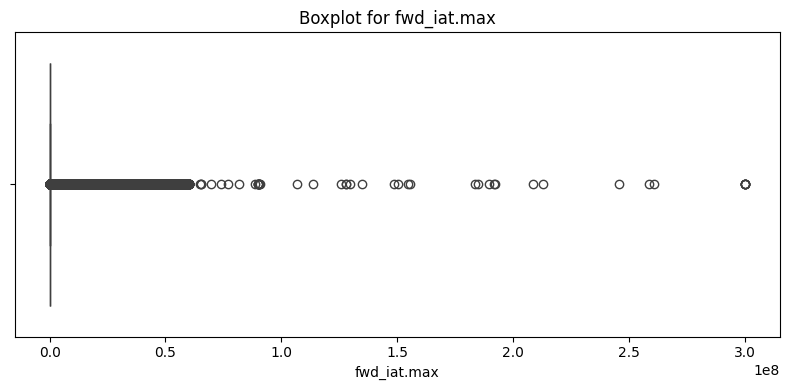

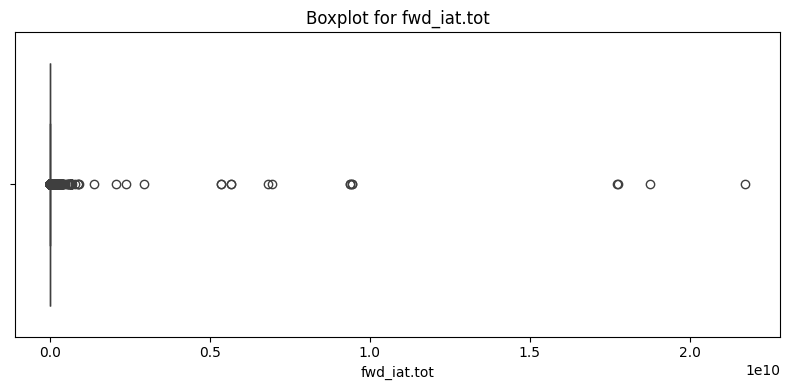

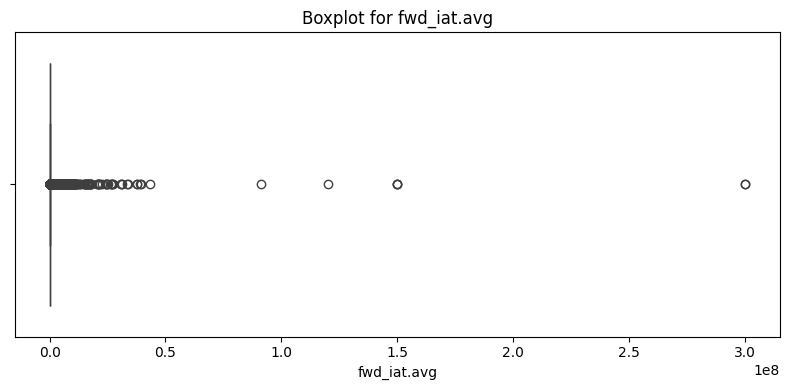

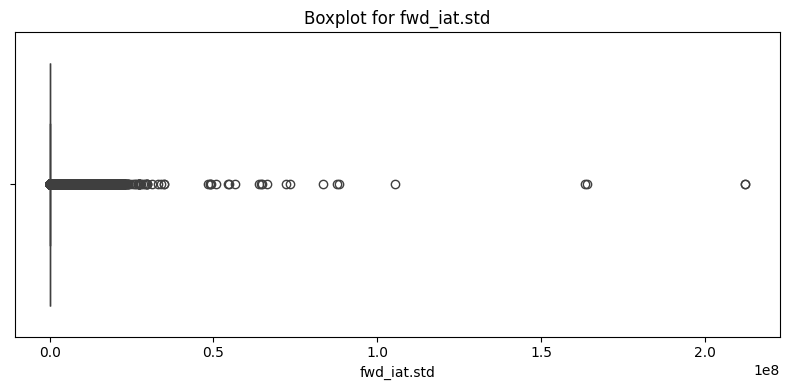

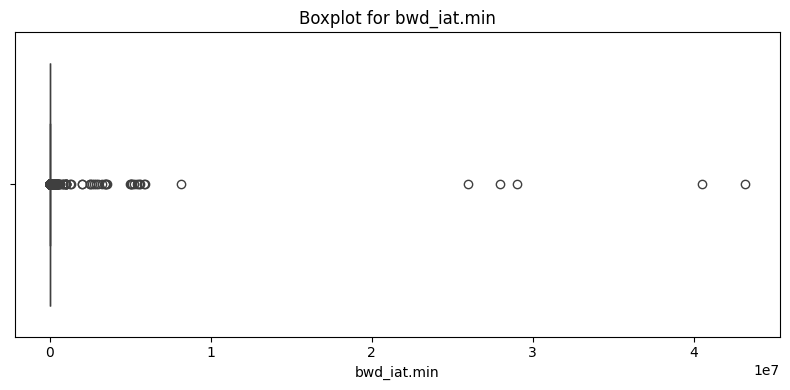

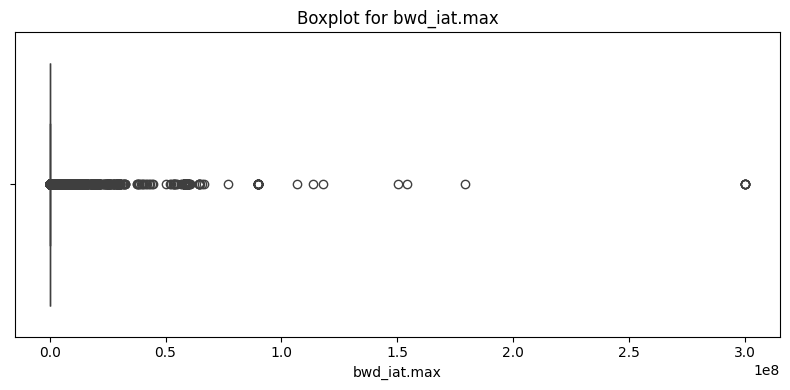

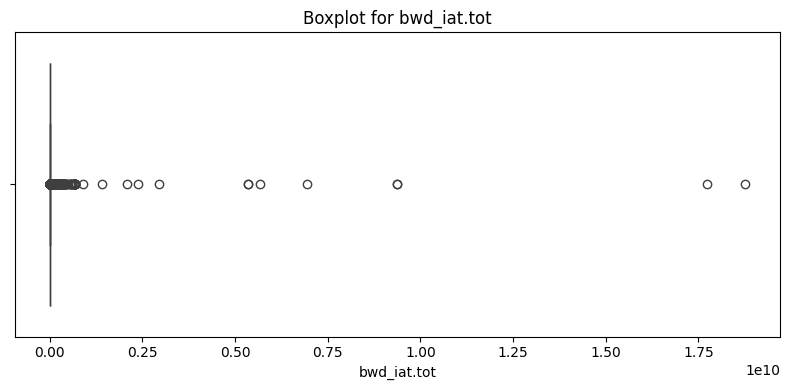

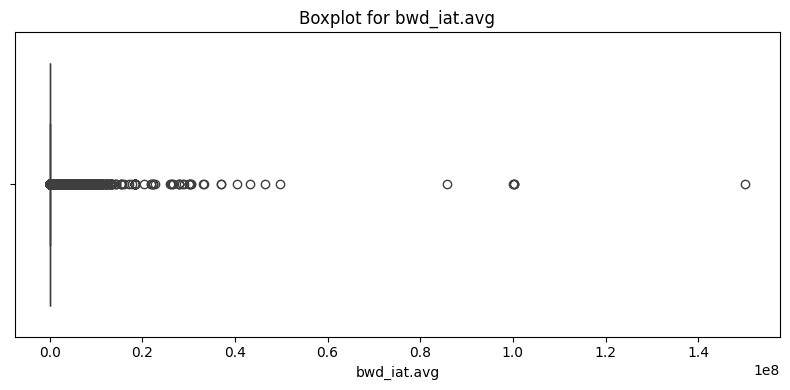

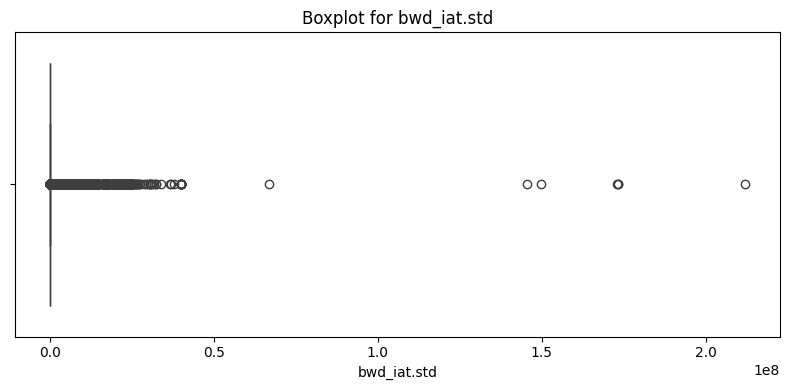

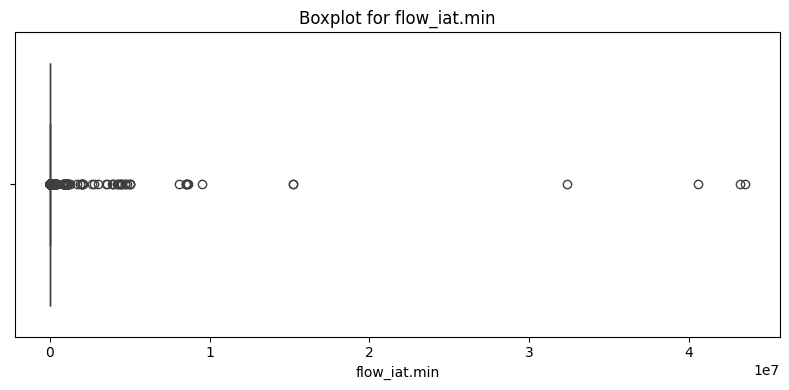

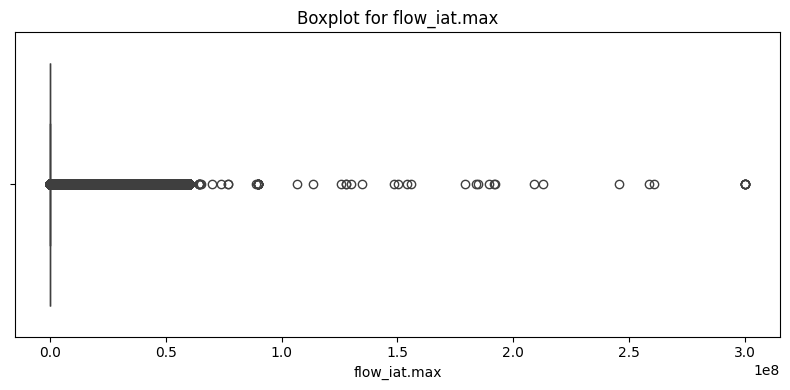

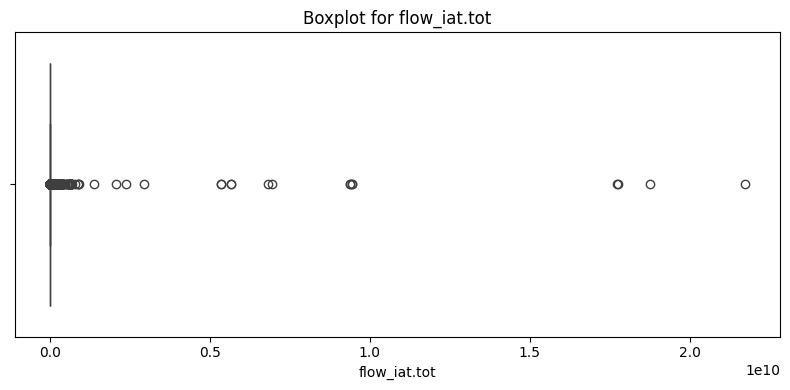

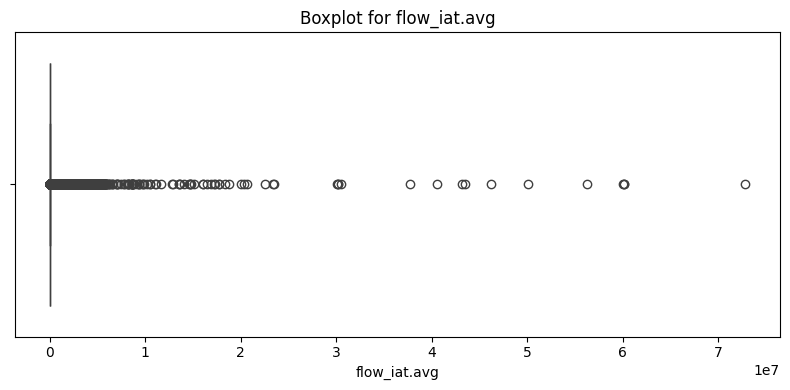

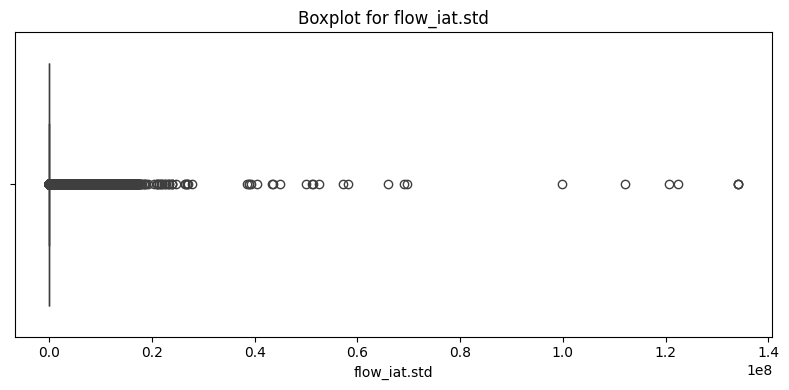

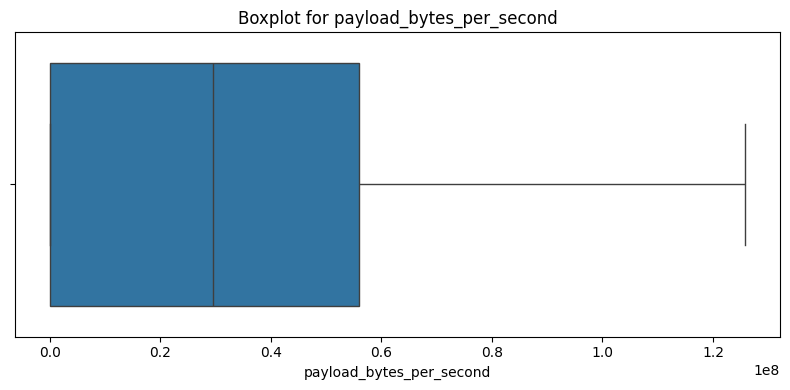

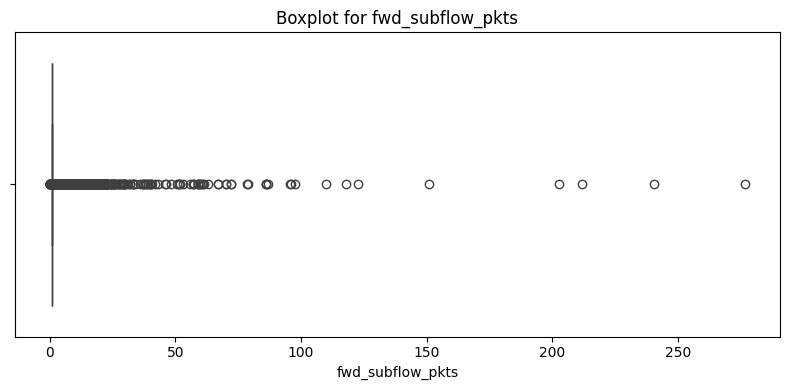

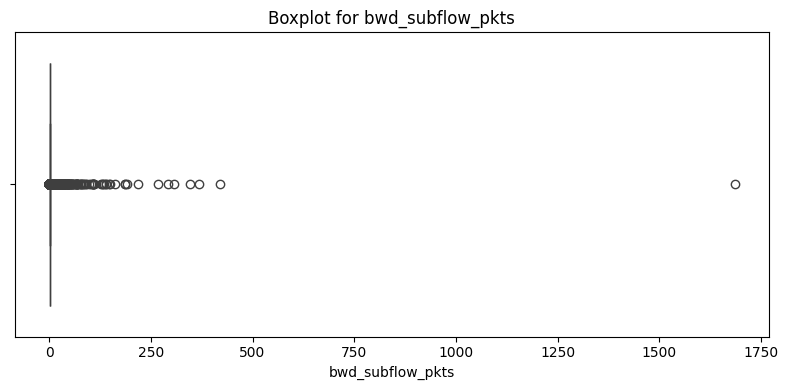

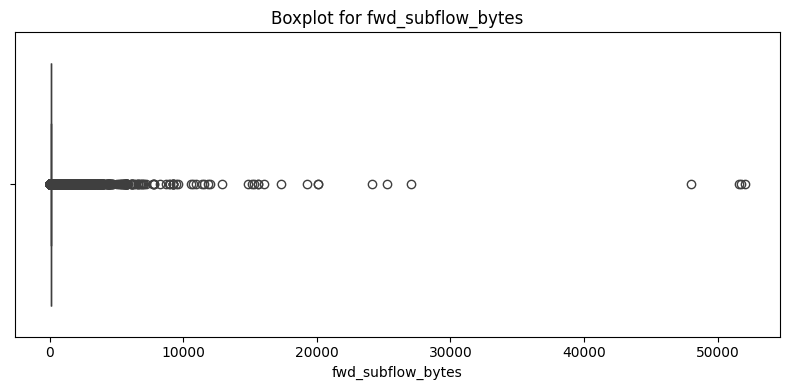

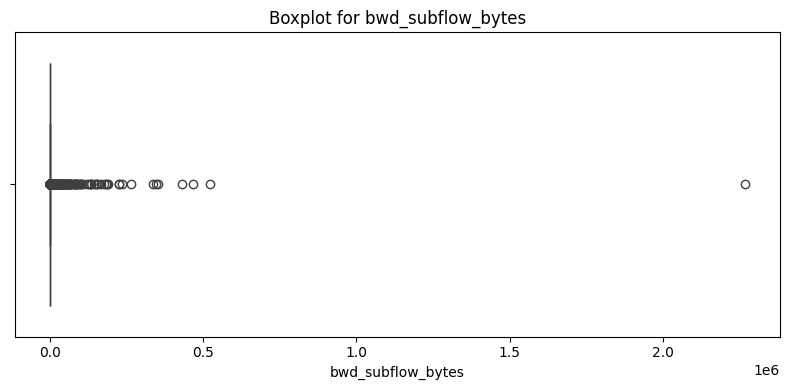

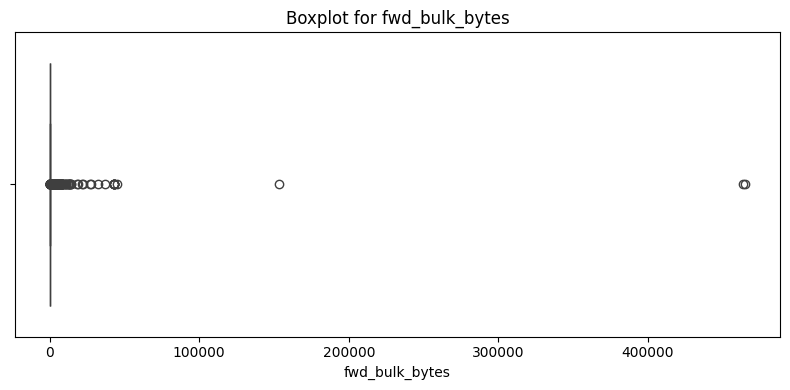

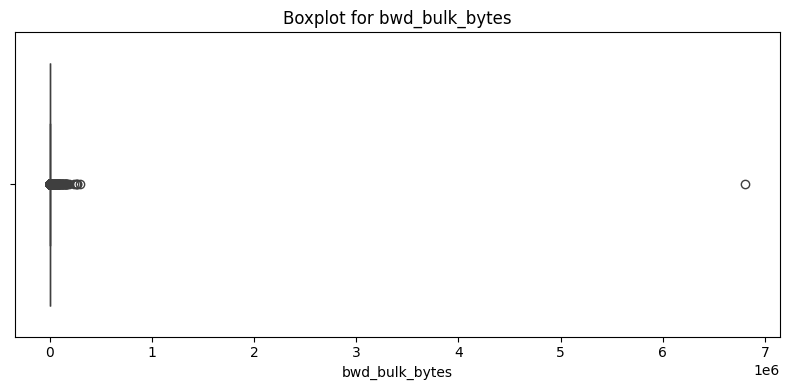

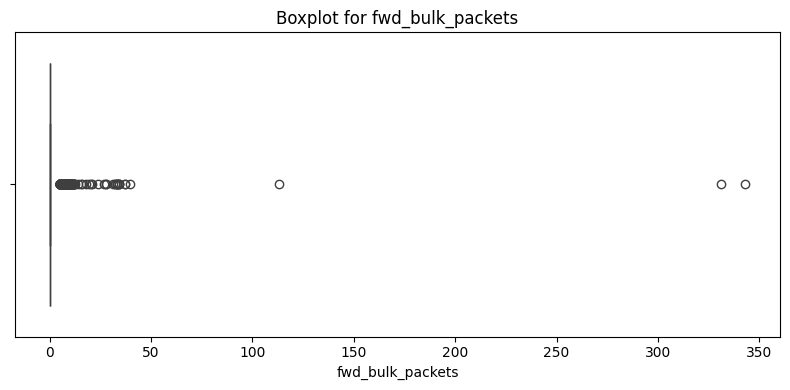

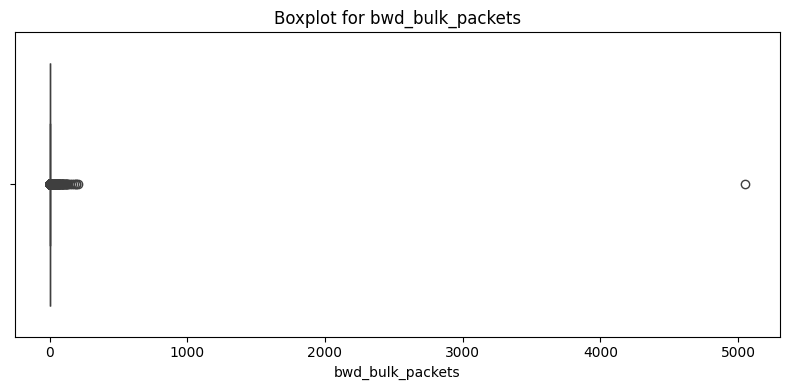

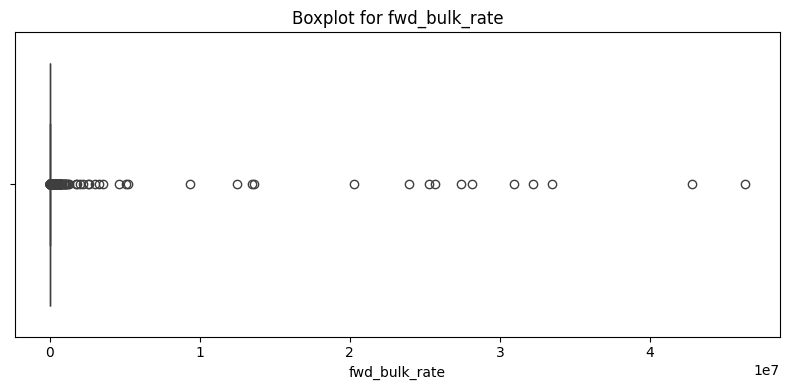

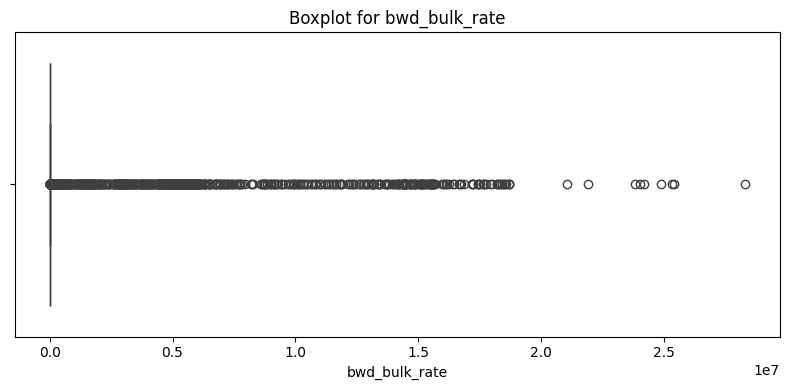

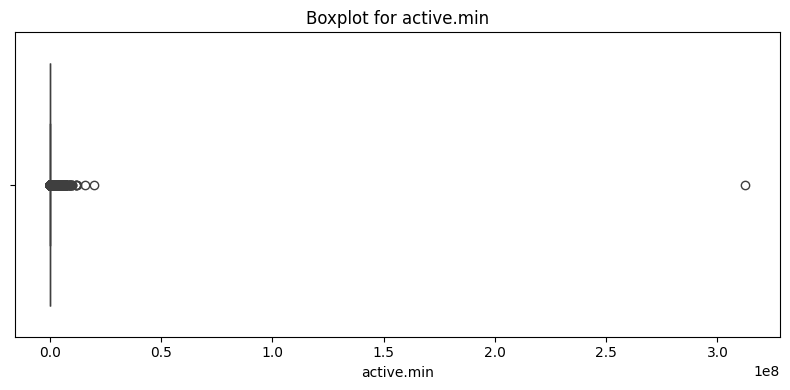

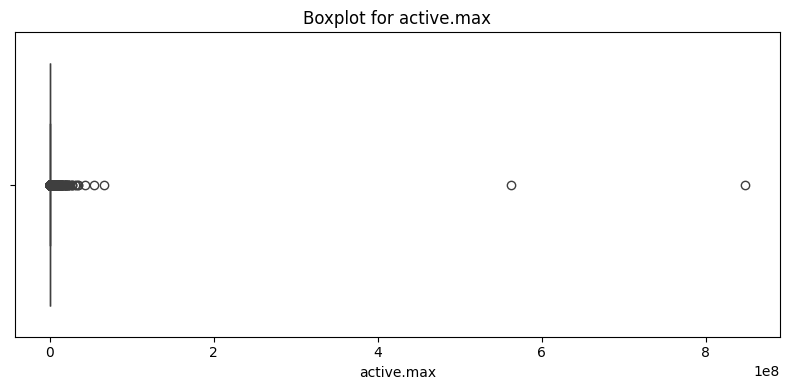

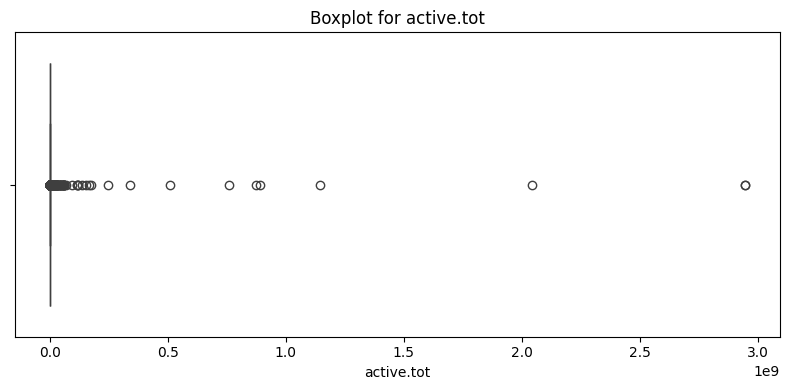

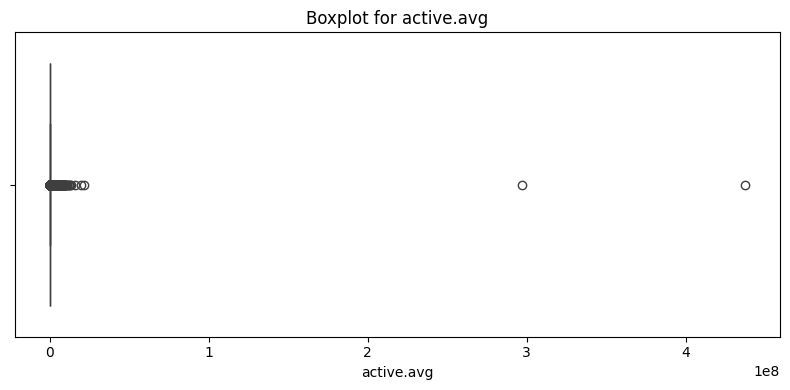

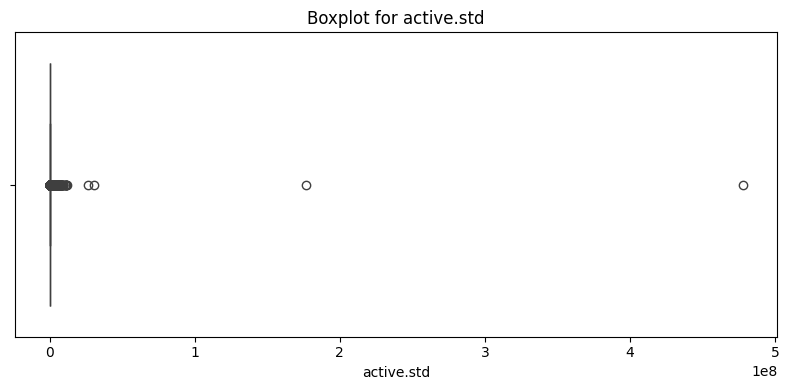

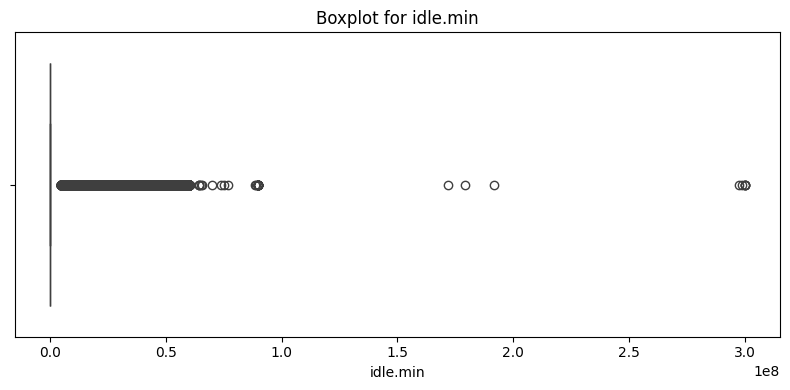

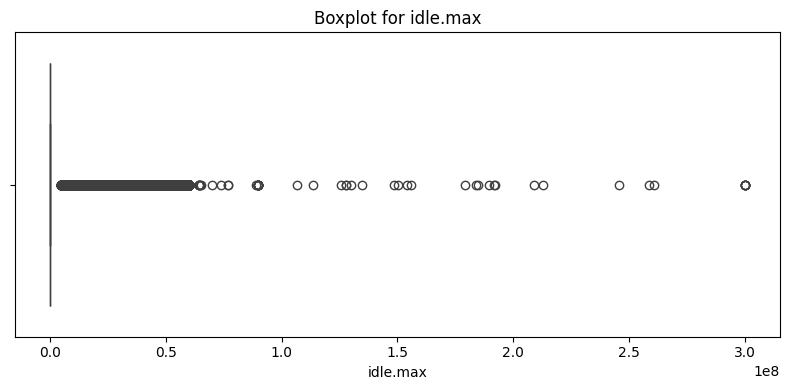

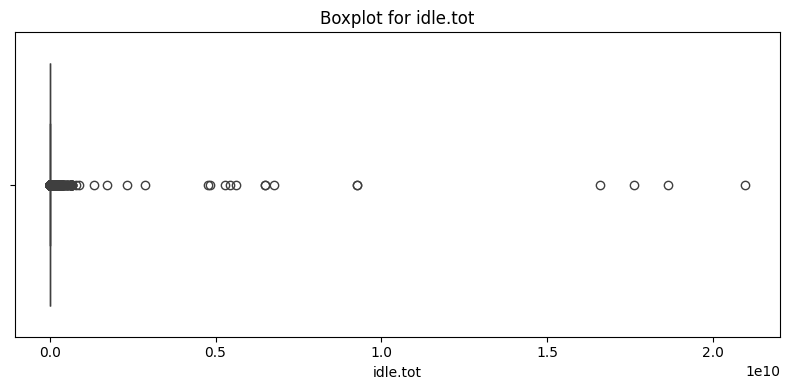

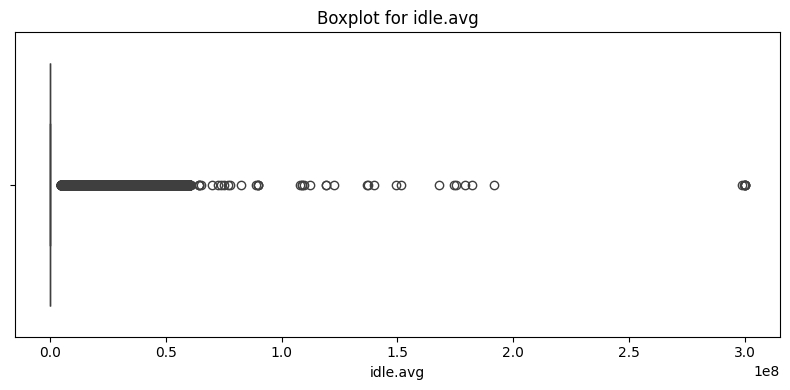

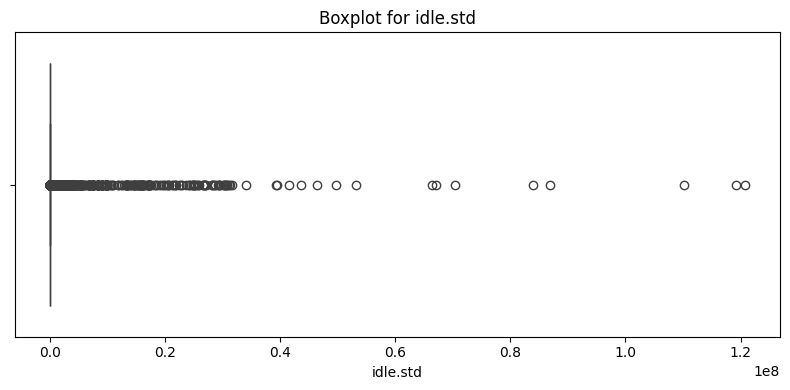

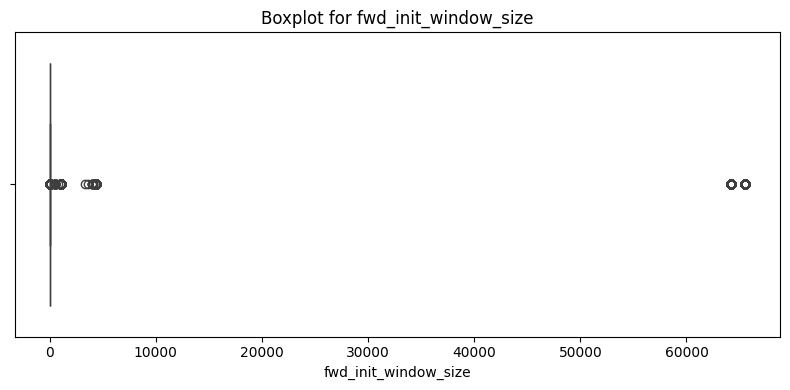

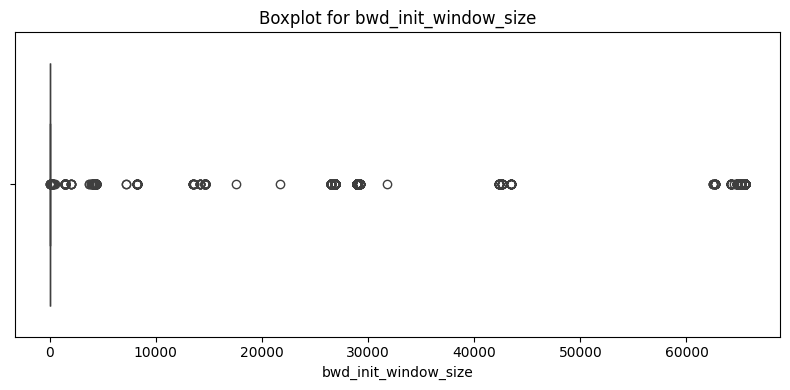

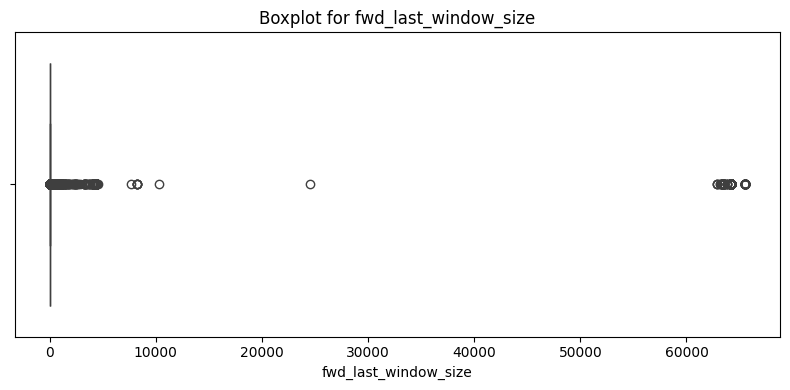

In [74]:
# Boxplot of numerical variables
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()

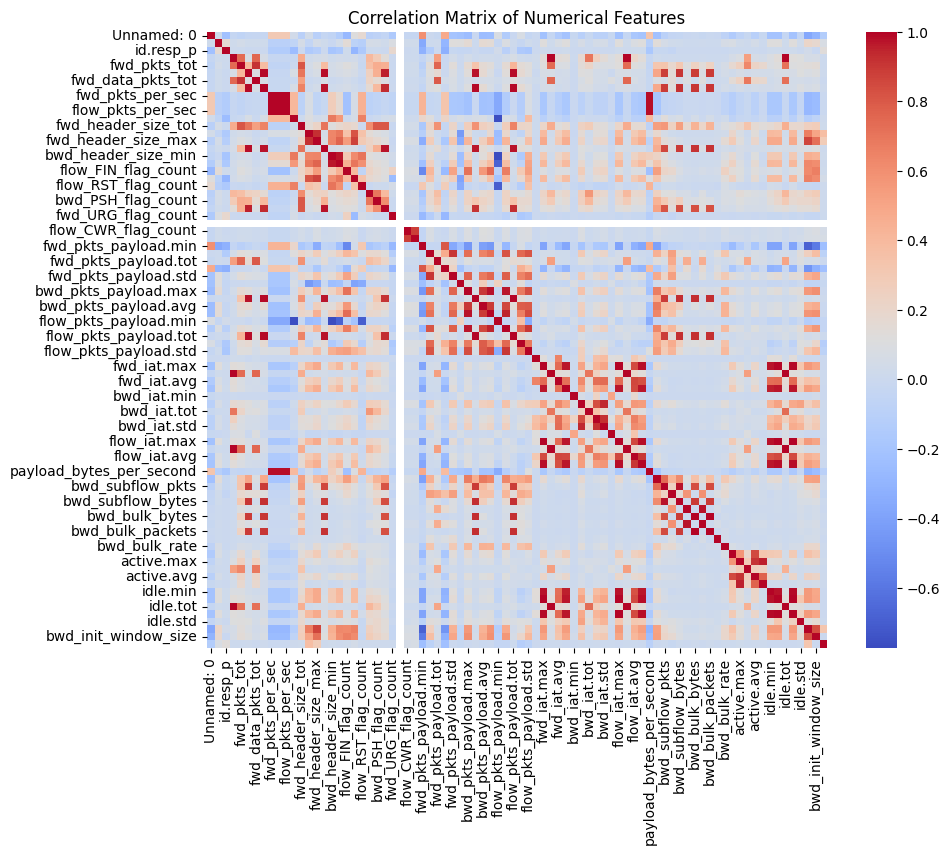

In [15]:
# Correlation matrix for numerical features
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### DATA CLEANING

In [16]:
#Checking for missing values
df.isnull().sum().sum()

np.int64(0)

In [17]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [18]:
#Removing unwanted variables
df= df.drop([ 'Unnamed: 0', 'id.orig_p', 'id.resp_p'], axis=1)
df.shape

(123117, 82)

In [19]:
# List of columns with known outliers 
outlier_columns = [
    'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot',
    'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
    'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
    'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
    'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count', 'flow_CWR_flag_count',
    'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
    'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min', 'bwd_pkts_payload.max',
    'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg', 'bwd_pkts_payload.std',
    'flow_pkts_payload.min', 'flow_pkts_payload.max', 'flow_pkts_payload.tot',
    'flow_pkts_payload.avg', 'flow_pkts_payload.std',
    'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.tot', 'fwd_iat.avg', 'fwd_iat.std',
    'bwd_iat.min', 'bwd_iat.max', 'bwd_iat.tot', 'bwd_iat.avg', 'bwd_iat.std',
    'flow_iat.min', 'flow_iat.max', 'flow_iat.tot', 'flow_iat.avg', 'flow_iat.std',
    'fwd_subflow_pkts', 'bwd_subflow_pkts', 'fwd_subflow_bytes', 'bwd_subflow_bytes',
    'fwd_bulk_bytes', 'bwd_bulk_bytes', 'fwd_bulk_packets', 'bwd_bulk_packets',
    'fwd_bulk_rate', 'bwd_bulk_rate',
    'active.min', 'active.max', 'active.tot', 'active.avg', 'active.std',
    'idle.min', 'idle.max', 'idle.tot', 'idle.avg', 'idle.std',
    'fwd_init_window_size', 'bwd_init_window_size', 'fwd_last_window_size'
]

# Filter out columns that are not in the DataFrame or not numeric
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
valid_outlier_columns = [col for col in outlier_columns if col in numerical_features]

# Apply winsorization (1st and 99th percentile clipping)
for col in valid_outlier_columns:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower_bound, upper_bound)


###  FEATURE ENGINEERING

In [31]:

# Identify categorical and numerical features
categorical_features = ['proto', 'service']
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Create transformers
numerical_transformer = Pipeline(steps=[('scaler', RobustScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X = df.drop('Attack_type', axis=1)
y = df['Attack_type']
X_processed = preprocessor.fit_transform(X)

# Convert the processed data back to a DataFrame
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
df_processed = pd.DataFrame(X_processed, columns=feature_names)
df_processed['Attack_type'] = y

display(df_processed.tail().style.set_sticky())

,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,proto_icmp,proto_tcp,proto_udp,service_-,service_dhcp,service_dns,service_http,service_irc,service_mqtt,service_ntp,service_radius,service_ssh,service_ssl,Attack_type
123112,0.500000,0.000000,0.000000,-1.000000,0.000000,-0.150610,-0.150609,-0.150610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-120.000000,-120.000000,-120.000000,-120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-120.000000,-120.000000,-60.000000,-2.450036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529412,0.470588,0.470588,0.470588,0.000000,-0.529436,0.000000,0.000000,-120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.470588,0.470588,0.470588,0.470588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,960.000000,0.000000,960.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NMAP_XMAS_TREE_SCAN
123113,0.750000,0.000000,0.000000,-1.000000,0.000000,-0.194754,-0.194753,-0.194754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-120.000000,-120.000000,-120.000000,-120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-120.000000,-120.000000,-60.000000,-2.450036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.764706,0.705882,0.705882,0.705882,0.000000,-0.529436,0.000000,0.000000,-120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.705882,0.705882,0.705882,0.705882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,960.000000,0.000000,960.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NMAP_XMAS_TREE_SCAN
123114,0.500000,0.000000,0.000000,-1.000000,0.000000,-0.150610,-0.150609,-0.150610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-120.000000,-120.000000,-120.000000,-120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-120.000000,-120.000000,-60.000000,-2.450036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529412,0.470588,0.470588,0.470588,0.000000,-0.529436,0.000000,0.000000,-120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.470588,0.470588,0.470588,0.470588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,960.000000,0.000000,

### DATA SPLITTING

In [21]:
# Step 1: Separate features (X) and target variable (y)
X = df_processed.drop('Attack_type', axis=1)
y = df_processed['Attack_type']

# Step 2: Encode categorical target labels into numerical labels
y_encoded = y.astype('category').cat.codes

# Step 3: Split data into training and test sets (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Step 4: Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: Print shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_train_smote shape: {X_train_smote.shape}, y_train_smote shape: {y_train_smote.shape}")


X_train shape: (98493, 92), y_train shape: (98493,)
X_test shape: (24624, 92), y_test shape: (24624,)
X_train_smote shape: (908724, 92), y_train_smote shape: (908724,)


### MODELLING

### XGBoost MODEL

In [22]:
# Step 1: Define and train the XGBoost classifier
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_smote)),
    eval_metric='mlogloss',
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_smote, y_train_smote)

# Step 2: Make predictions
y_pred = xgb_model.predict(X_test)

#  Map class indices back to attack labels (for readability)
attack_labels = y.astype('category').cat.categories
print("Class index mapping:")
for i, label in enumerate(attack_labels):
    print(f"{i} --> {label}")


Class index mapping:
0 --> ARP_poisioning
1 --> DDOS_Slowloris
2 --> DOS_SYN_Hping
3 --> MQTT_Publish
4 --> Metasploit_Brute_Force_SSH
5 --> NMAP_FIN_SCAN
6 --> NMAP_OS_DETECTION
7 --> NMAP_TCP_scan
8 --> NMAP_UDP_SCAN
9 --> NMAP_XMAS_TREE_SCAN
10 --> Thing_Speak
11 --> Wipro_bulb


In [23]:
# Cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, X, y_encoded, cv=cv, scoring='f1_macro')
print("CV F1 macro average:", np.mean(scores))



CV F1 macro average: 0.9654032367081916


### MODEL EVALUATION

In [24]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1550
           1       0.89      0.94      0.91       107
           2       1.00      1.00      1.00     18932
           3       1.00      1.00      1.00       829
           4       0.67      0.86      0.75         7
           5       0.71      0.83      0.77         6
           6       1.00      1.00      1.00       400
           7       1.00      1.00      1.00       200
           8       0.98      0.97      0.98       518
           9       1.00      1.00      1.00       402
          10       0.99      0.98      0.99      1622
          11       0.96      0.96      0.96        51

    accuracy                           1.00     24624
   macro avg       0.93      0.96      0.94     24624
weighted avg       1.00      1.00      1.00     24624



In [25]:
#  Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

#  Precision (macro = all classes treated equally)
precision = precision_score(y_test, y_pred, average='macro')
print("Precision (macro):", precision)

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall (macro):", recall)

#  F1-score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score (macro):", f1)

Accuracy: 0.997035412605588
Precision (macro): 0.9316411396563934
Recall (macro): 0.9610474415860036
F1-score (macro): 0.9448893933646237


ROC AUC (macro): 0.9998749400641328


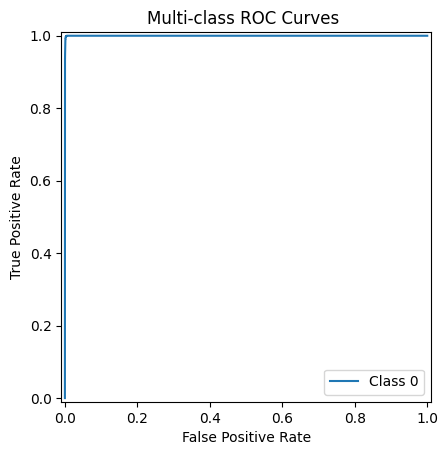

In [26]:
#ROC and AUC
y_pred_proba = xgb_model.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC (macro):", auc)

# 6. ROC Curve (Plotting for first 3 classes)
for i in range(min(1, y_test_bin.shape[1])):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'Class {i}').plot()

plt.title('Multi-class ROC Curves ')
plt.show()

In [27]:
#  feature importances
importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print("\nTop features:")
print(importance_df.head(20))



Top features:
                 Feature  Importance
87          service_mqtt    0.190059
21    fwd_URG_flag_count    0.176142
90           service_ssh    0.046838
15   flow_FIN_flag_count    0.042348
29  fwd_pkts_payload.std    0.036906
85          service_http    0.035523
9    fwd_header_size_tot    0.034000
13   bwd_header_size_min    0.032775
78  fwd_last_window_size    0.028261
14   bwd_header_size_max    0.026135
16   flow_SYN_flag_count    0.022966
25  fwd_pkts_payload.min    0.022167
86           service_irc    0.019108
34  bwd_pkts_payload.std    0.018486
91           service_ssl    0.016636
6       bwd_pkts_per_sec    0.015683
28  fwd_pkts_payload.avg    0.015218
33  bwd_pkts_payload.avg    0.015023
3      fwd_data_pkts_tot    0.014471
84           service_dns    0.013836


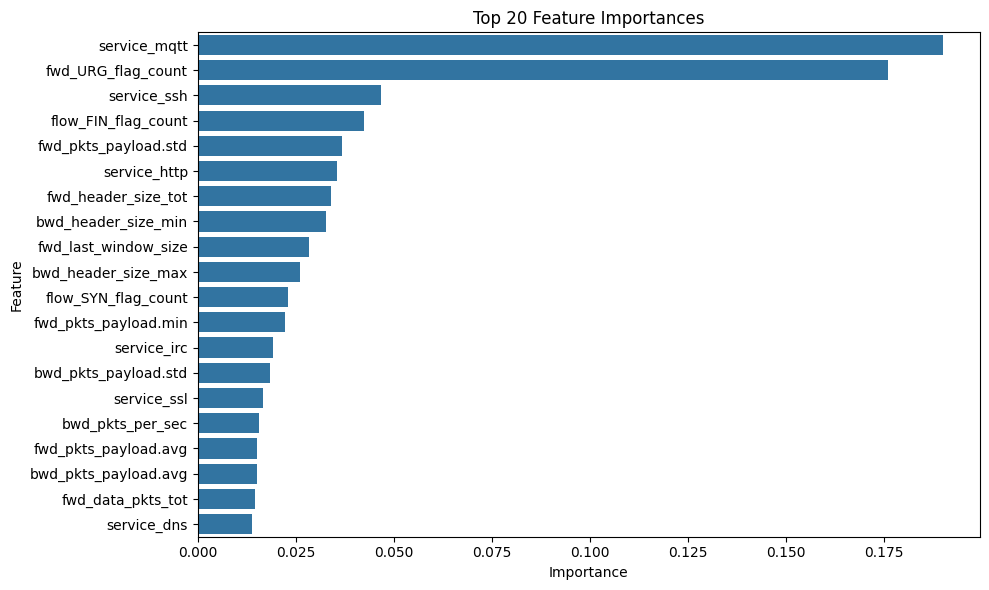

In [28]:
#Feature importance plot
importances = xgb_model.feature_importances_
features = X_train.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(20))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

### Checking the model on raw data

In [35]:
feature_columns = [
    'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot',
    'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio',
    'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
    'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
    'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
    'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
    'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
    'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
    'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
    'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
    'bwd_pkts_payload.std', 'flow_pkts_payload.min', 'flow_pkts_payload.max',
    'flow_pkts_payload.tot', 'flow_pkts_payload.avg', 'flow_pkts_payload.std',
    'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.tot', 'fwd_iat.avg', 'fwd_iat.std',
    'bwd_iat.min', 'bwd_iat.max', 'bwd_iat.tot', 'bwd_iat.avg', 'bwd_iat.std',
    'flow_iat.min', 'flow_iat.max', 'flow_iat.tot', 'flow_iat.avg', 'flow_iat.std',
    'payload_bytes_per_second', 'fwd_subflow_pkts', 'bwd_subflow_pkts',
    'fwd_subflow_bytes', 'bwd_subflow_bytes', 'fwd_bulk_bytes', 'bwd_bulk_bytes',
    'fwd_bulk_packets', 'bwd_bulk_packets', 'fwd_bulk_rate', 'bwd_bulk_rate',
    'active.min', 'active.max', 'active.tot', 'active.avg', 'active.std',
    'idle.min', 'idle.max', 'idle.tot', 'idle.avg', 'idle.std',
    'fwd_init_window_size', 'bwd_init_window_size', 'fwd_last_window_size',
    'proto_icmp', 'proto_tcp', 'proto_udp',
    'service_-', 'service_dhcp', 'service_dns', 'service_http', 'service_irc',
    'service_mqtt', 'service_ntp', 'service_radius', 'service_ssh', 'service_ssl'
]

# Input data as a list of 89 values
raw_values = [
    0.5, 0.0, 0.0, -1.0, 0.0, -0.150610, -0.150609, -0.150610, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, 0.0, 1.0, 0.0,
    0.0, 1.0, 0.0, 0.0, 0.0, -120.0, -120.0, -120.0, -120.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -120.0, -120.0, -60.0, -2.450036,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.529412, 0.470588, 0.470588, 0.470588, 0.0, -0.529436,
    0.0, 0.0, -120.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.470588, 0.470588, 0.470588, 0.470588, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 960.0, 0.0, 960.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
]

# Convert to DataFrame
new_flow = pd.DataFrame([raw_values], columns=feature_columns)

# Predict using the trained model
prediction = xgb_model.predict(new_flow)
attack_types = {
    0: "ARP_poisioning",
    1: "DDOS_Slowloris",
    2: "DOS_SYN_Hping",
    3: "MQTT_Publish",
    4: "Metasploit_Brute_Force_SSH",
    5: "NMAP_FIN_SCAN",
    6: "NMAP_OS_DETECTION",
    7: "NMAP_TCP_scan",
    8: "NMAP_UDP_SCAN",
    9: "NMAP_XMAS_TREE_SCAN",
    10: "Thing_Speak",
    11: "Wipro_bulb"
}
# Print result
print("Predicted Class:", prediction[0])
print(f"✅ Predicted Class: {attack_types.get(prediction[0], 'Unknown')}")

Predicted Class: 9
✅ Predicted Class: NMAP_XMAS_TREE_SCAN


### ________________________________________________________________________________________________________________________________________________________

### Conclusion

The exponential growth of cyber threats necessitates the development of intelligent intrusion detection systems. This project presents a multi-class classification model based on the XGBoost algorithm to detect and differentiate between several types of network attacks using flow-based features. The dataset includes 89 features capturing statistical properties of both forward and backward packet flows, enabling nuanced detection of attacks such as DOS SYN floods, ARP Poisoning, MQTT-based intrusions, and various NMAP scanning techniques. The trained model achieves high accuracy and demonstrates strong generalization capabilities. It effectively identifies complex attack patterns like the XMAS Tree Scan, contributing to more precise threat analysis and faster response times in real-world cybersecurity environments.